## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score , recall_score
from sklearn.metrics import f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
## Lets get some stats of the data set provided
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print("Observe the different feature type present in the data:")  
print(df.dtypes)
print(df.info())

Observe the different feature type present in the data:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  flo

**Here we will observe the distribution of our classes**

In [5]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,4)
fraud_share=round(classes[1]/df['Class'].count()*100,4)
print('Normal Share: ' + str(normal_share)+' %')
print('Fraudulent Share ' + str(fraud_share)+ ' %')

Normal Share: 99.8273 %
Fraudulent Share 0.1727 %


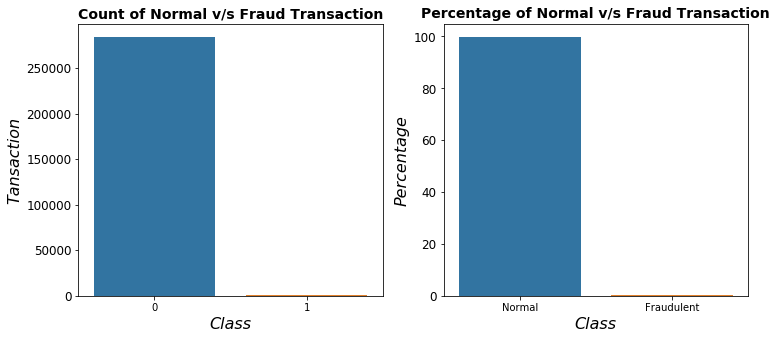

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel('Tansaction',fontsize=16, fontstyle='italic')
plt.xlabel('Class',fontsize=16, fontstyle='italic')
plt.yticks(fontsize=12)
plt.title('Count of Normal v/s Fraud Transaction',fontsize=14, fontweight='bold')


plt.subplot(1,2,2)
df_per_plot = pd.DataFrame({'Class':['Normal','Fraudulent'],'Percentage':[normal_share,fraud_share]})
sns.barplot(x = 'Class' , y = 'Percentage',data=df_per_plot)
plt.ylabel('Percentage',fontsize=16, fontstyle='italic')
plt.xlabel('Class',fontsize=16, fontstyle='italic')
plt.yticks(fontsize=12)
plt.title('Percentage of Normal v/s Fraud Transaction',fontsize=14, fontweight='bold')

plt.show()

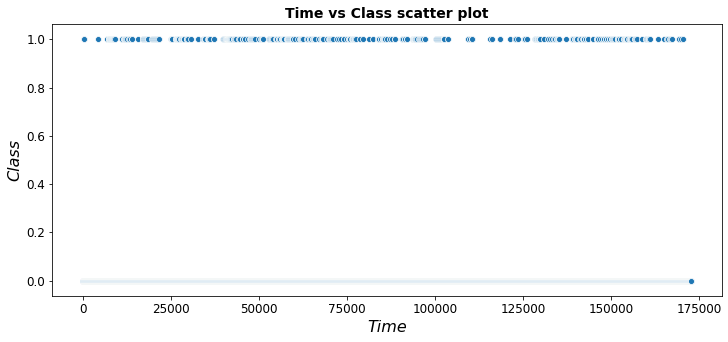

In [7]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize = (12,5))
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot",fontsize=14, fontweight='bold')
plt.ylabel('Class',fontsize=16, fontstyle='italic')
plt.xlabel('Time',fontsize=16, fontstyle='italic')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

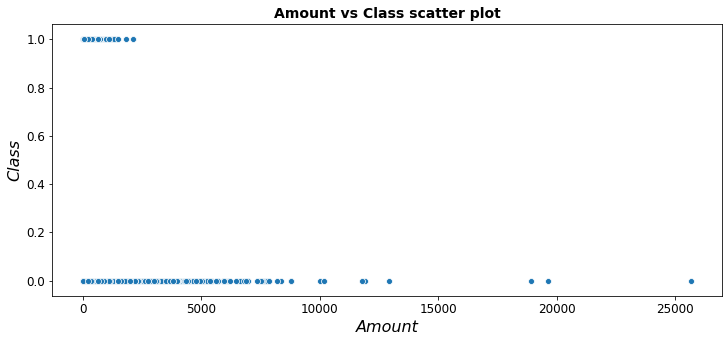

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize = (12,5))
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot",fontsize=14, fontweight='bold')
plt.ylabel('Class',fontsize=16, fontstyle='italic')
plt.xlabel('Amount',fontsize=16, fontstyle='italic')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

**Observation**<br>
Based on the scatterplots for Amount and Time v/s Class we can clearly see that both Fraud and normal transactions are distributed over time but on the Amount v/s class plot we can clearly see that the fraud transactions are done for lower amounts , so there is clearly a pattern there. 

In [9]:
# Drop unnecessary columns
###We will be dropping the time column as there is not much pattern there between the class variable and time variable 
df = df.drop('Time',axis = 1)

In [10]:
##Checking the remaining columns
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

<Figure size 1440x1200 with 0 Axes>

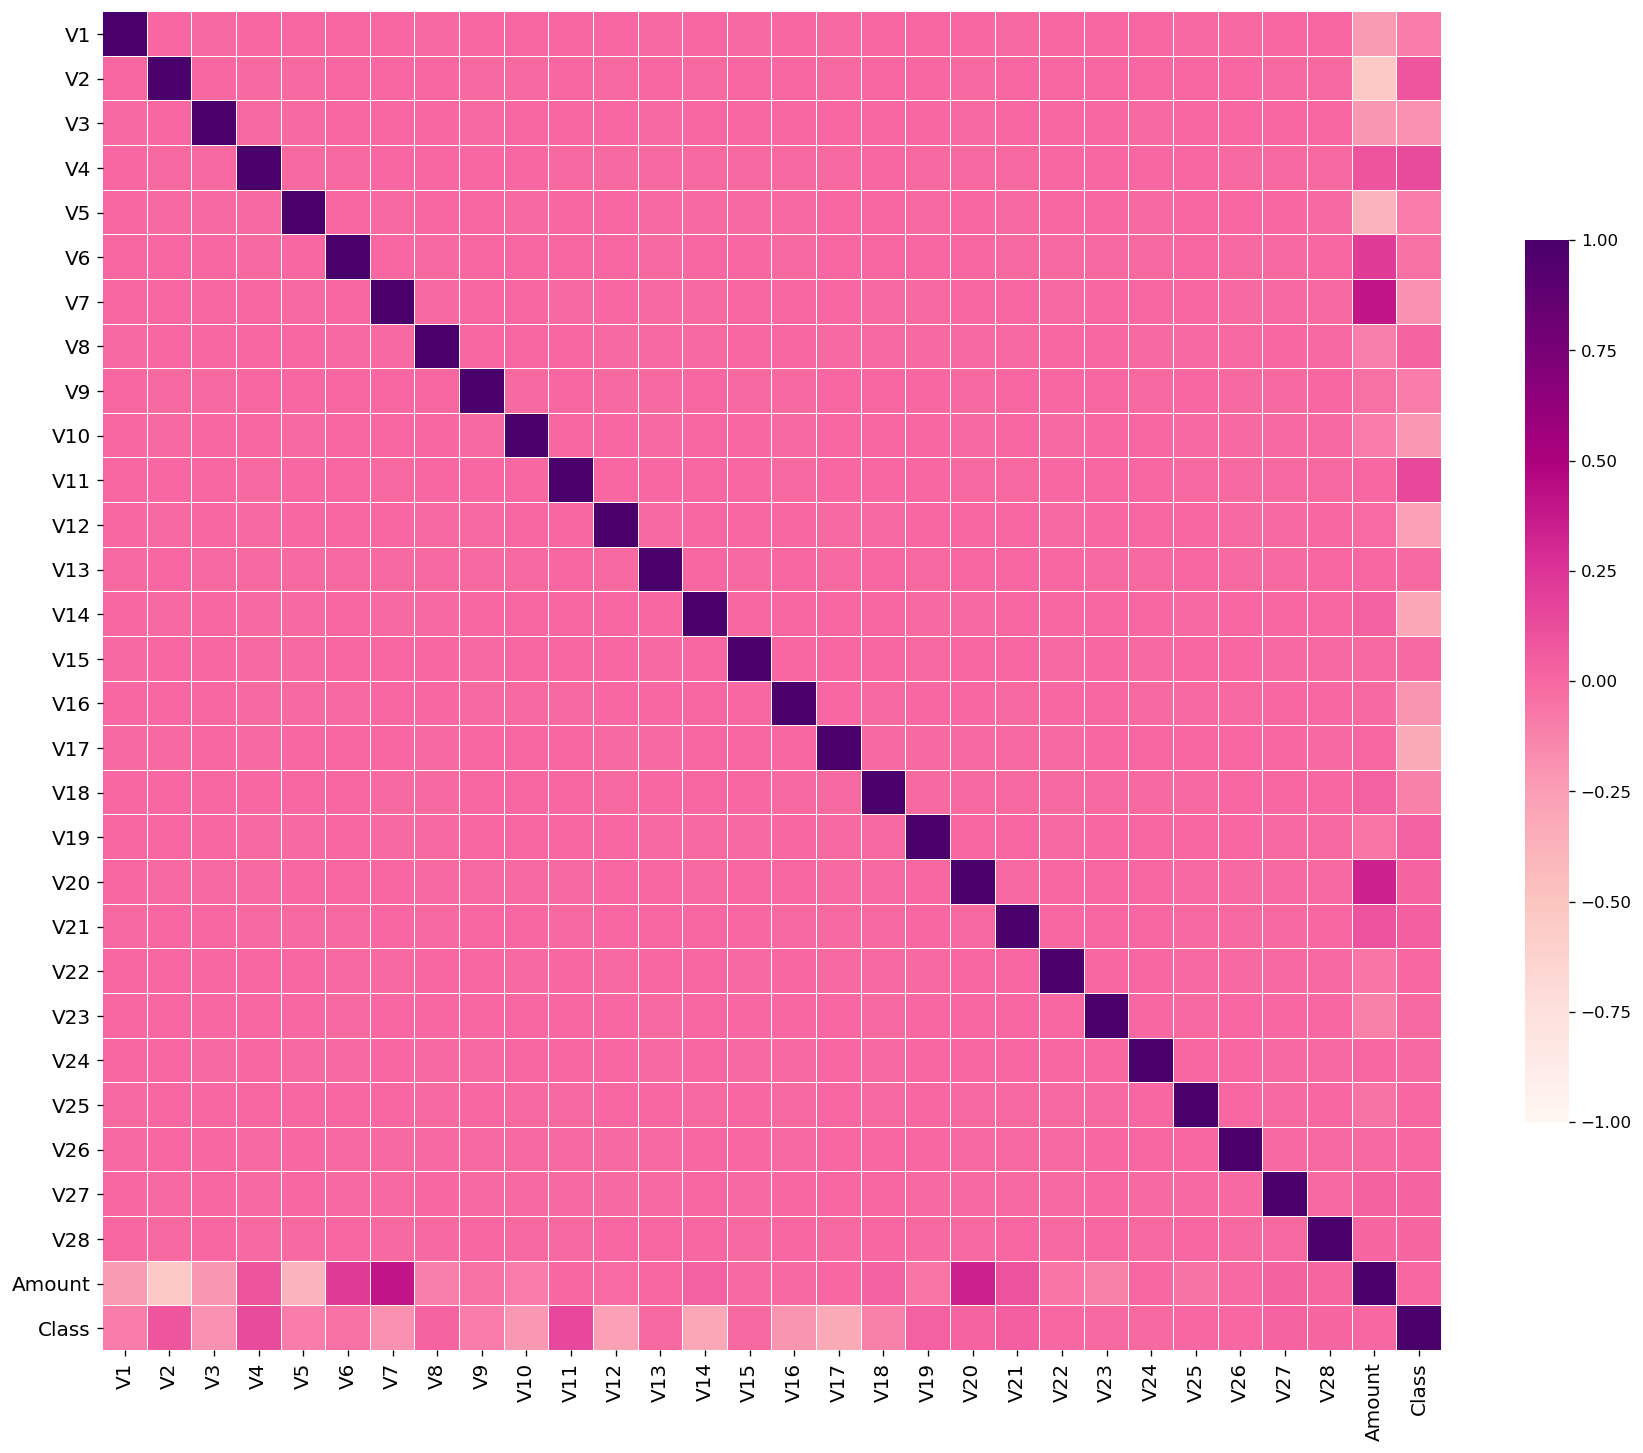

In [11]:
#Plotting a heatmap to understand the correlation between the variables of imbalanced data set
plt.figure(figsize = (12,10), dpi=120)
corr_matrix_new = df.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
ax_corr1 = sns.heatmap(corr_matrix_new, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True,  linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.autoscale()
plt.show()

### Splitting the data into train & test data

In [12]:
y = df['Class'] #class variable

X = df.drop('Class',axis = 1)

In [13]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.30,stratify = y,random_state = 42)

In [14]:
# checking for Class imbalance after train test split
y_train.value_counts()/y_train.shape

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [15]:
y_test.value_counts()/y_test.shape

0    0.998268
1    0.001732
Name: Class, dtype: float64

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [17]:
### Since PCA is already applied on all the variables except the Amount field , lets performed scaling on the amount field first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])

X_test[['Amount']] = scaler.transform(X_test[['Amount']])

In [18]:
X_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,-0.222719,...,-0.038329,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,-0.321082
214082,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,0.517022,...,-0.030437,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,0.243475
106005,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,0.086419,...,2.189260,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,4.797594
58619,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,0.128383,...,0.225957,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,-0.331514
191638,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,-0.283699,...,0.154309,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,-0.331514


In [19]:
X_test.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
186882,-2.537331,1.890864,-0.840555,-1.102759,-2.105725,0.367811,-2.737844,-3.543314,-0.483147,0.112724,...,-1.959611,4.328165,-2.167329,1.022567,-0.241143,-1.094885,-0.475427,-0.177157,-0.082691,-0.201469
165754,-0.250839,1.104108,0.206089,0.417324,1.204079,-0.350694,1.369769,-0.133535,-0.957100,-0.261170,...,-0.128120,0.133048,0.499501,-0.392572,-0.393364,0.233354,-0.490717,0.143897,0.136810,-0.312626
235285,0.568980,-2.520416,-1.114138,1.670652,-1.128945,0.398822,0.190403,0.161493,0.840595,0.099172,...,1.039287,0.318037,-0.760732,-0.181332,0.595866,-0.760920,-1.048927,-0.096970,0.088686,2.416826
101271,1.328892,0.226908,-0.308968,0.381772,0.238490,-0.282946,0.029460,-0.079962,0.227173,-0.267319,...,-0.050933,-0.379270,-1.148959,-0.047403,-1.074464,0.375683,0.182045,-0.031732,0.017501,-0.290023
5832,1.124863,-0.165691,1.337053,1.030033,-0.891116,0.202926,-0.825094,0.163280,2.301808,-0.641129,...,-0.196966,-0.216512,-0.195607,0.072785,0.045625,0.135192,0.308617,0.001142,0.017673,-0.281092


### Plotting the distribution of a variable

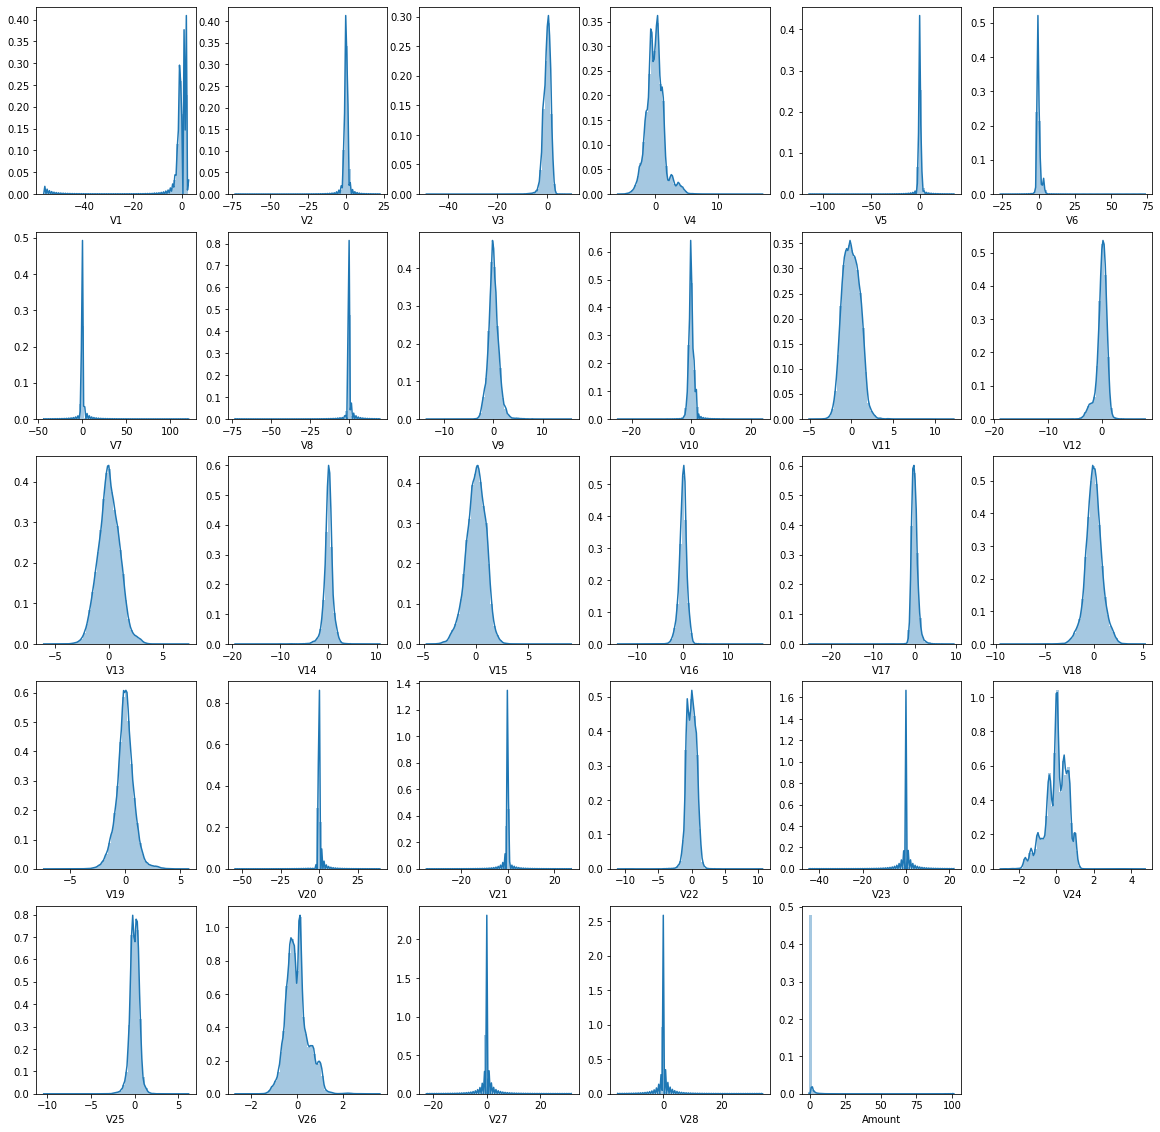

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
var_list = X_train.columns
var_list

plt.figure(figsize=(20,20))
i=0
for col in var_list:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

**Based on the above graphs its clear that there are skewed variables in the dataset. Lets check on the skewnes values and they use power transform to transform the data .**

In [21]:
var_list_skew = []

for i in var_list:
    var_list_skew.append(X_train[i].skew())
    
skew_var_df =  pd.concat([pd.DataFrame(var_list,columns = ['Feature_Var']),pd.DataFrame(var_list_skew,columns=['Skewness'])],axis = 1)

skew_var_df.set_index("Feature_Var",inplace = True)
skew_col_list  = list(skew_var_df.loc[(skew_var_df['Skewness']> 1) | (skew_var_df['Skewness'] <  -1) ].index)

##List of variables that are skewed
skew_col_list

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer

pwtrn = PowerTransformer(copy = False)

X_train[skew_col_list] = pwtrn.fit_transform(X_train[skew_col_list])

X_test[skew_col_list] = pwtrn.transform(X_test[skew_col_list])

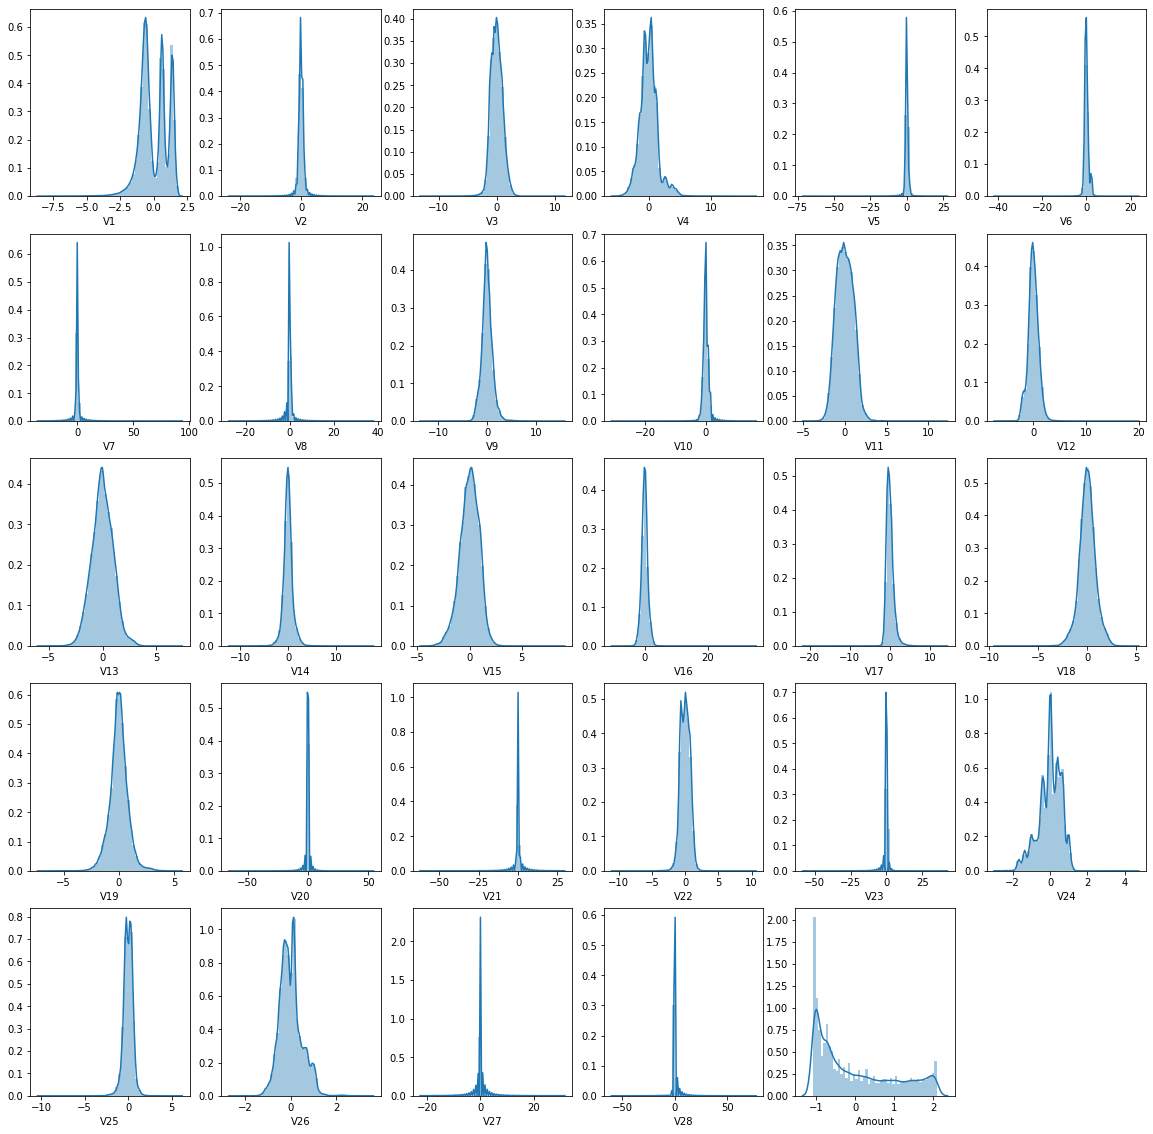

In [23]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(20,20))
i=0
for col in var_list:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Building different models on the imbalanced dataset

**Logistic Regression with L1 Regularisation (Imbalanced Dataset)**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression #import the package

#perform cross validation

solvers = ['liblinear', 'saga']
penalty = ['l1']
c_values = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logcv_l1 = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid,
                            cv=cv,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_logcv_l1.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression Unbalanced Dataset (L1): ', grid_logcv_l1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression Unbalanced Dataset (L1): ', grid_logcv_l1.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished


Best ROC AUC score for Logistic Regression Unbalanced Dataset (L1):  0.9844562825020777
Best hyperparameters for Logistic Regression Unbalanced Dataset (L1):  {'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}


In [25]:
# Instantiating the Logistic Regression model with best hyperparams
logL1_reg_imb_model = LogisticRegression(C=100.0 , penalty = 'l1',solver = 'saga')

# Fitting the model on train dataset
logL1_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=100.0, penalty='l1', solver='saga')

In [26]:
# Predictions on the train set
y_train_pred = logL1_reg_imb_model.predict(X_train)

In [28]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='(ROC-AUC = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [28]:
# Predicted probability for train set
y_train_pred_proba = logL1_reg_imb_model.predict_proba(X_train)[:,1]

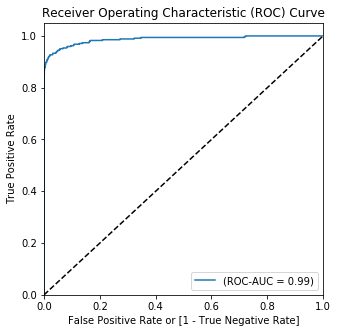

In [29]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [30]:
# Making prediction on the test set
y_test_pred = logL1_reg_imb_model.predict(X_test)

In [31]:
# Predicted probability for test set
y_test_pred_proba = logL1_reg_imb_model.predict_proba(X_test)[:,1]

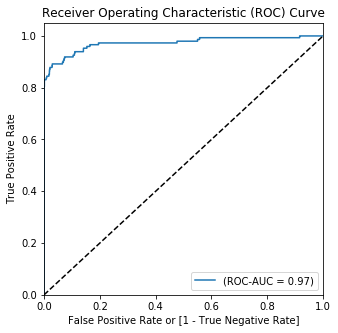

In [32]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [33]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l1 = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_test_l1 = roc_auc_score(y_test, y_test_pred_proba)
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(y_train, y_train_pred_proba)
threshold_l1 = thresholds_l1[np.argmax(tpr_l1-fpr_l1)]
f1_score_l1 = round(f1_score(y_test, y_test_pred)*100,2)
recall_l1 = round(recall_score(y_test, y_test_pred)*100,3)

In [34]:
## Lets store the output metrics to a data frame so that we can compare them across all the models created
##creating the empty dataframe
df_results = pd.DataFrame(columns=['Model Name','roc_auc_train','roc_auc_test','f1_score','recall_score'])

In [35]:
df_results_log_l1_unbal = pd.DataFrame({'Model Name': 'Logistic Regression imbalanced data (L1 Regularisation)','roc_auc_train':roc_auc_train_l1,
                                        'roc_auc_test':roc_auc_test_l1,'f1_score':f1_score_l1,'recall_score':recall_l1},index=[0])

**Logistic Regression with L2 Regularisation (Imbalanced Dataset)**

In [43]:

solvers_l2 = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty_l2 = ['l2']
c_values_l2 = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid_l2 = dict(solver=solvers_l2,penalty=penalty_l2,C=c_values_l2)

cv_l2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logcv_l2 = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l2,
                            cv=cv_l2,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_logcv_l2.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression Unbalanced Dataset (L2): ', grid_logcv_l2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression Unbalanced Dataset (L2): ', grid_logcv_l2.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.7min finished


Best ROC AUC score:  0.9849799653425398
Best hyperparameters:  {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [36]:
# Instantiating the model with best hyperparams
logL2_reg_imb_model = LogisticRegression(C=0.001 , penalty = 'l2',solver = 'lbfgs')

# Fitting the model on train dataset
logL2_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [37]:
# Predictions on the train set
y_train_pred_l2 = logL2_reg_imb_model.predict(X_train)

In [38]:
# Predicted probability
y_train_pred_proba_l2 = logL2_reg_imb_model.predict_proba(X_train)[:,1]

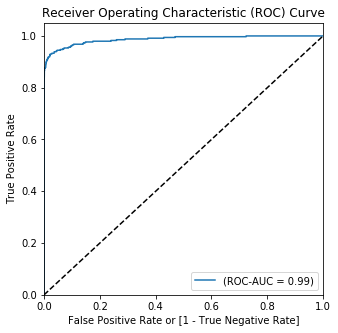

In [39]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_l2)

In [40]:
# Making prediction on the test set
y_test_pred_l2 = logL2_reg_imb_model.predict(X_test)

In [41]:
# Predicted probability
y_test_pred_proba_l2 = logL2_reg_imb_model.predict_proba(X_test)[:,1]

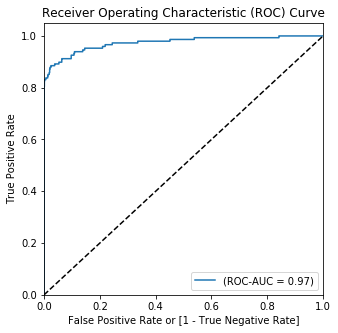

In [42]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_l2)

In [43]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l2 = roc_auc_score(y_train, y_train_pred_proba_l2)
roc_auc_test_l2 = roc_auc_score(y_test, y_test_pred_proba_l2)
fpr_l2, tpr_l2, thresholds_l2 = roc_curve(y_train, y_train_pred_proba_l2)
threshold_l2 = thresholds_l2[np.argmax(tpr_l2-fpr_l2)]
f1_score_l2 = round(f1_score(y_test, y_test_pred_l2)*100,2)
recall_l2 = round(recall_score(y_test, y_test_pred_l2)*100,3)

In [44]:
df_results_log_l2_unbal = pd.DataFrame({'Model Name': 'Logistic Regression imbalanced data (L2 Regularisation)','roc_auc_train':roc_auc_train_l2,
                                       'roc_auc_test':roc_auc_test_l2,'f1_score':f1_score_l2,'recall_score':recall_l2},index=[0])

**Decision Tree Imbalanced Dataset**

In [82]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning Max_depth , min_samples_split , min_samples_leaf ,max_leaf_nodes,criterion

#perform cross validation
grid_params_dectr = {'max_depth': range(1, 20,5),
                    'min_samples_leaf': range(5, 400, 40),
                    'criterion': ["entropy", "gini"]
                    }
cv_dtr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr,
                            cv=cv_dtr,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )

#perform hyperparameter tuning
grid_dtrcls.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Unbalanced Dataset: ', grid_dtrcls.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Unbalanced Dataset: ', grid_dtrcls.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.0min finished


Best ROC AUC score for Decision Unbalanced Dataset:  0.9573176992127941
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 325}


In [83]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  min_samples_split ,max_leaf_nodes

#perform cross validation
grid_params_dectr1 = {'min_samples_split': range(5, 200, 20),
                    'max_leaf_nodes': range(5, 200, 15)
                    }
cv_dtr1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls1 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr1,
                            cv=cv_dtr1,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )

#perform hyperparameter tuning
grid_dtrcls1.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Unbalanced Dataset: ', grid_dtrcls1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Unbalanced Dataset: ', grid_dtrcls1.best_params_)

Fitting 3 folds for each of 130 candidates, totalling 390 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 390 out of 390 | elapsed: 12.3min finished


Best ROC AUC score for Decision Unbalanced Dataset:  0.9294140612034821
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'max_leaf_nodes': 65, 'min_samples_split': 145}


In [45]:
##Decision Tree Model with optimal Hyperparameters

dtrimb_model = DecisionTreeClassifier(random_state=42,
                                      max_leaf_nodes = 65,
                                      min_samples_split = 145,
                                      criterion = 'entropy',
                                      max_depth=6,
                                      min_samples_leaf = 325
                                     )
# Fitting the model on train dataset
dtrimb_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=65,
                       min_samples_leaf=325, min_samples_split=145,
                       random_state=42)

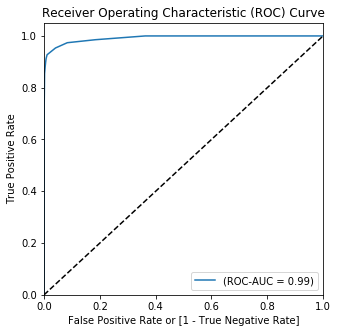

In [46]:
# Predictions on the train set
y_train_pred_dtr = dtrimb_model.predict(X_train)

# Predicted probability
y_train_pred_proba_dtr = dtrimb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_dtr)

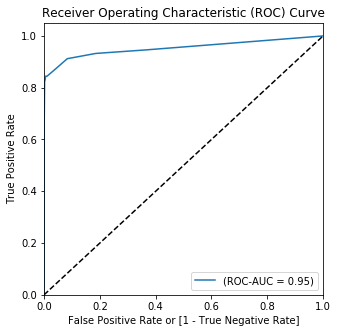

In [47]:
# Making prediction on the test set
y_test_pred_dtr = dtrimb_model.predict(X_test)

# Predicted probability
y_test_pred_proba_dtr = dtrimb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_dtr)

In [48]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_dtr = roc_auc_score(y_train, y_train_pred_proba_dtr)
roc_auc_test_dtr = roc_auc_score(y_test, y_test_pred_proba_dtr)
fpr_dtr, tpr_dtr, thresholds_dtr = roc_curve(y_train, y_train_pred_proba_dtr)
threshold_dtr = thresholds_dtr[np.argmax(tpr_dtr -fpr_dtr)]
f1_score_dtr = round(f1_score(y_test, y_test_pred_dtr)*100,2)
recall_dtr = round(recall_score(y_test, y_test_pred_dtr)*100,3)

In [49]:
df_results_dtr_unbal = pd.DataFrame({'Model Name': 'Decision Tree Unbalanced Dataset','roc_auc_train':roc_auc_train_dtr,
                                       'roc_auc_test':roc_auc_test_dtr,'f1_score':f1_score_dtr,'recall_score':recall_dtr},index=[0])

**Randonforest Classifier Imbalanced Dataset**

In [106]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning max_depth

#perform cross validation
grid_params_rf = {'max_depth': range(4, 40, 4)}

cv_rf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf,
                            cv=cv_rf,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.6min finished


Best ROC AUC score for Decision Unbalanced Dataset:  0.9772508474208594
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'max_depth': 12}


In [107]:
# scores of GridSearch CV
scores = grid_rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,59.060966,0.529202,0.776589,0.042753,4,{'max_depth': 4},0.974027,0.955822,0.952496,0.960782,0.009464,5,0.967957,0.978915,0.968744,0.971872,4.990726e-03
1,113.525757,0.343278,0.905912,0.010182,8,{'max_depth': 8},0.987024,0.960430,0.967327,0.971594,0.011268,3,0.990545,0.994844,0.993748,0.993045,1.823940e-03
2,162.213978,1.630366,1.172200,0.078520,12,{'max_depth': 12},0.986887,0.968459,0.976407,0.977251,0.007547,1,0.999935,0.999984,0.999984,0.999967,2.329681e-05
3,190.828966,4.314972,1.237368,0.056631,16,{'max_depth': 16},0.980253,0.967936,0.973550,0.973913,0.005035,2,0.999997,0.999999,0.999999,0.999998,8.597093e-07
4,202.824092,5.114583,1.291560,0.017660,20,{'max_depth': 20},0.961939,0.967524,0.960519,0.963327,0.003024,4,1.000000,1.000000,1.000000,1.000000,1.433292e-16


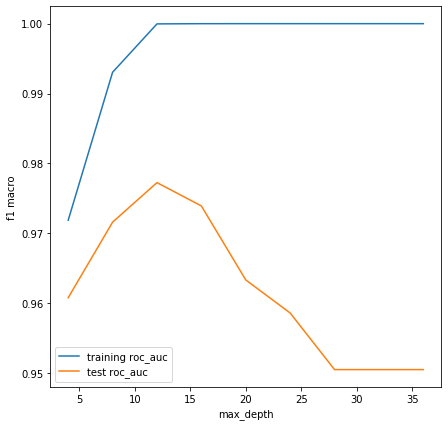

In [115]:
# plotting roc_auc score with max_depth
plt.figure(figsize=(7,7))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_depth")
plt.ylabel("AUC ROC")
plt.legend()
plt.show()

In [116]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning max_features

#perform cross validation
grid_params_rf1 = {'max_features': [5,6]}

cv_rf1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf1 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf1,
                            cv=cv_rf1,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf1.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf1.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.2min finished


Best ROC AUC score for Decision Unbalanced Dataset:  0.9506316751088725
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'max_features': 6}


In [117]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning min_samples_leaf

#perform cross validation
grid_params_rf2 = {'min_samples_leaf': range(100, 600, 50)}

cv_rf2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf2 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf2,
                            cv=cv_rf2,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf2.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf2.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.1min finished


Best ROC AUC score for Decision Unbalanced Dataset:  0.9778895202050689
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'min_samples_leaf': 200}


In [118]:
# scores of GridSearch CV
scores_rf_1 = grid_rf2.cv_results_
pd.DataFrame(scores_rf_1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,160.198574,1.522831,1.138954,0.012927,100,{'min_samples_leaf': 100},0.982708,0.962414,0.956141,0.967088,0.011338,10,0.998310,0.998199,0.998201,0.998236,0.000052
1,154.110513,2.036904,1.115352,0.046097,150,{'min_samples_leaf': 150},0.985220,0.973142,0.961611,0.973324,0.009639,3,0.997448,0.997306,0.997502,0.997419,0.000083
2,146.215740,2.462639,1.088424,0.045720,200,{'min_samples_leaf': 200},0.985028,0.974404,0.974236,0.977890,0.005048,1,0.996616,0.996532,0.996499,0.996549,0.000049
3,145.862254,1.039541,1.042216,0.022491,250,{'min_samples_leaf': 250},0.983831,0.976488,0.967858,0.976059,0.006528,2,0.995972,0.995749,0.995841,0.995854,0.000091
4,140.817410,1.436016,1.034236,0.006464,300,{'min_samples_leaf': 300},0.982696,0.966792,0.965158,0.971549,0.007911,6,0.995413,0.994973,0.995105,0.995164,0.000184


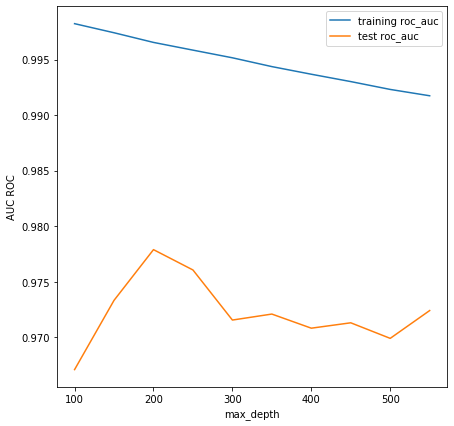

In [120]:
# plotting roc_auc score with max_depth
plt.figure(figsize=(7,7))
plt.plot(scores_rf_1["param_min_samples_leaf"], 
         scores_rf_1["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores_rf_1["param_min_samples_leaf"], 
         scores_rf_1["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC ROC")
plt.legend()
plt.show()

In [34]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning n_estimators

#perform cross validation
grid_params_rf3 = {'n_estimators': range(0, 1200, 200)}

cv_rf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf3 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf3,
                            cv=cv_rf3,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf3.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf3.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf3.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 43.6min finished


Best ROC AUC score for Random Forest Unbalanced Dataset:  0.9591249351034407
Best hyperparameters for Random Forest Unbalanced Dataset:  {'n_estimators': 1000}


In [35]:
# scores of GridSearch CV
scores_rf_2 = grid_rf3.cv_results_
pd.DataFrame(scores_rf_2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.173868,0.004101,0.000000,0.000000,0,{'n_estimators': 0},NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
1,387.305224,6.014237,2.422521,0.036706,200,{'n_estimators': 200},0.958634,0.954418,0.945265,0.952772,0.005581,5,1.0,1.0,1.0,1.0,0.0
2,788.831740,11.236887,4.769828,0.018011,400,{'n_estimators': 400},0.958145,0.953766,0.952995,0.954969,0.002268,4,1.0,1.0,1.0,1.0,0.0
3,1148.325538,16.456581,6.744892,0.104660,600,{'n_estimators': 600},0.961800,0.953192,0.956709,0.957233,0.003534,3,1.0,1.0,1.0,1.0,0.0
4,1399.226724,51.092045,7.593325,0.363166,800,{'n_estimators': 800},0.961261,0.956867,0.956258,0.958129,0.002229,2,1.0,1.0,1.0,1.0,0.0


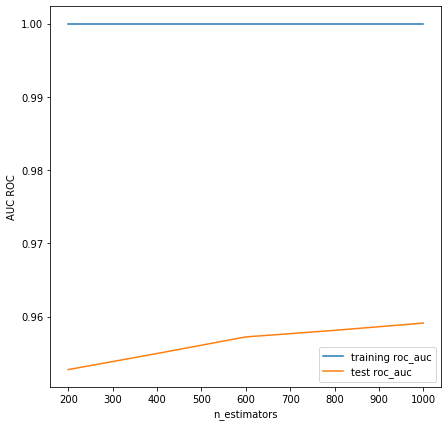

In [36]:
# plotting roc_auc score with max_depth
plt.figure(figsize=(7,7))
plt.plot(scores_rf_2["param_n_estimators"], 
         scores_rf_2["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores_rf_2["param_n_estimators"], 
         scores_rf_2["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("n_estimators")
plt.ylabel("AUC ROC")
plt.legend()
plt.show()

In [127]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning max_leaf_nodes

#perform cross validation
grid_params_rf4 = {'max_leaf_nodes': range(10, 100, 10) }

cv_rf4 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf4 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf4,
                            cv=cv_rf4,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf4.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf4.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf4.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  8.9min finished


Best ROC AUC score for Random Forest Unbalanced Dataset:  0.9747526696602827
Best hyperparameters for Random Forest Unbalanced Dataset:  {'max_leaf_nodes': 70}


In [128]:
# scores of GridSearch CV
scores_rf_3 = grid_rf4.cv_results_
pd.DataFrame(scores_rf_3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,62.175003,1.050790,0.777922,0.104756,10,{'max_leaf_nodes': 10},0.933440,0.945550,0.924607,0.934532,0.008585,9,0.938452,0.952231,0.938827,0.943170,0.006409
1,77.796906,2.013429,0.841088,0.078366,20,{'max_leaf_nodes': 20},0.938363,0.956730,0.948440,0.947845,0.007510,8,0.941183,0.971228,0.964630,0.959014,0.012893
2,100.146318,4.577266,0.931843,0.044381,30,{'max_leaf_nodes': 30},0.966192,0.963411,0.955558,0.961720,0.004503,6,0.967035,0.984466,0.976450,0.975984,0.007124
3,125.017330,5.198665,1.116349,0.094658,40,{'max_leaf_nodes': 40},0.977135,0.964242,0.956578,0.965985,0.008482,5,0.991945,0.997480,0.993167,0.994198,0.002374
4,150.851271,3.294651,1.065816,0.120189,50,{'max_leaf_nodes': 50},0.978847,0.961124,0.977528,0.972500,0.008062,3,0.998225,0.999936,0.999449,0.999203,0.000720


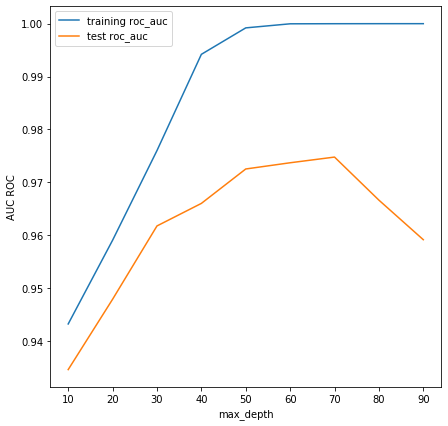

In [129]:
# plotting roc_auc score with max_depth
plt.figure(figsize=(7,7))
plt.plot(scores_rf_3["param_max_leaf_nodes"], 
         scores_rf_3["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores_rf_3["param_max_leaf_nodes"], 
         scores_rf_3["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_leaf_nodes")
plt.ylabel("AUC ROC")
plt.legend()
plt.show()

In [26]:
## Hyper parameter tuning for RandomForest Classifier

##Tuning min_samples_split

#perform cross validation
grid_params_rf5 = {'min_samples_split': range(50, 800, 50)}

cv_rf5 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf5 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = grid_params_rf5,
                            cv=cv_rf5,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf5.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf5.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf5.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 19.3min finished


Best ROC AUC score for Random Forest Unbalanced Dataset:  0.975381167300244
Best hyperparameters for Random Forest Unbalanced Dataset:  {'min_samples_split': 700}


In [27]:
# scores of GridSearch CV
scores_rf_5 = grid_rf5.cv_results_
pd.DataFrame(scores_rf_5).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,190.044760,3.076734,1.179513,0.017125,50,{'min_samples_split': 50},0.968261,0.971881,0.958882,0.966341,0.005478,14,0.999904,0.999938,0.999931,0.999924,0.000015
1,186.243964,1.247976,1.195097,0.015436,100,{'min_samples_split': 100},0.969901,0.957694,0.960246,0.962614,0.005257,15,0.999822,0.999878,0.999852,0.999850,0.000023
2,189.818576,3.534727,1.213090,0.038699,150,{'min_samples_split': 150},0.977299,0.965042,0.966782,0.969708,0.005414,7,0.999721,0.999747,0.999718,0.999729,0.000013
3,193.774753,1.514753,1.201791,0.016529,200,{'min_samples_split': 200},0.978193,0.968820,0.961169,0.969394,0.006962,10,0.999684,0.999687,0.999675,0.999682,0.000005
4,192.936660,1.326417,1.220072,0.047415,250,{'min_samples_split': 250},0.981624,0.967813,0.960436,0.969958,0.008782,6,0.999658,0.999657,0.999660,0.999658,0.000001


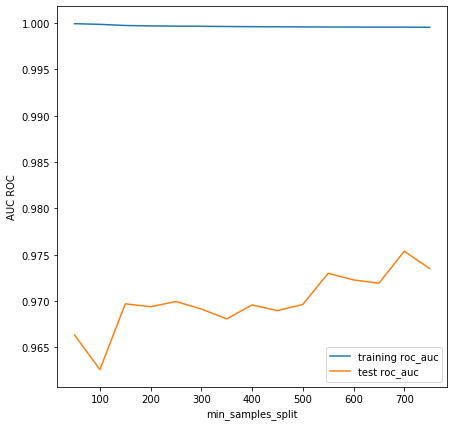

In [28]:
# plotting roc_auc score with max_depth
plt.figure(figsize=(7,7))
plt.plot(scores_rf_5["param_min_samples_split"], 
         scores_rf_5["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores_rf_5["param_min_samples_split"], 
         scores_rf_5["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("AUC ROC")
plt.legend()
plt.show()

In [37]:
# Create the final parameter grid based on the above results

final_param_grid_rf =  {'max_features': [6],  
                        'max_depth': [10,12],
                        'min_samples_leaf': [200,250],
                        'n_estimators': [1000],
                        'min_samples_split': [700],
                        'max_leaf_nodes': [60,70]
                       }

cv_rf_final_unb = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_rf_final_unb = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                            param_grid = final_param_grid_rf,
                            cv=cv_rf_final_unb,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_rf_final_unb.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Random Forest Unbalanced Dataset: ', grid_rf_final_unb.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Random Forest Unbalanced Dataset: ', grid_rf_final_unb.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 79.9min finished


Best ROC AUC score for Random Forest Unbalanced Dataset:  0.975577082088197
Best hyperparameters for Random Forest Unbalanced Dataset:  {'max_depth': 10, 'max_features': 6, 'max_leaf_nodes': 60, 'min_samples_leaf': 250, 'min_samples_split': 700, 'n_estimators': 1000}


In [50]:
##Final Random Forest model using the optimal hyperparams

rf_model_unbal = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=6,
                             max_leaf_nodes=60,
                             min_samples_leaf=250, 
                             min_samples_split=700,
                             n_estimators=1000,
                             random_state=42)


# Fitting the model on train dataset
rf_model_unbal.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=6, max_leaf_nodes=60,
                       min_samples_leaf=250, min_samples_split=700,
                       n_estimators=1000, random_state=42)

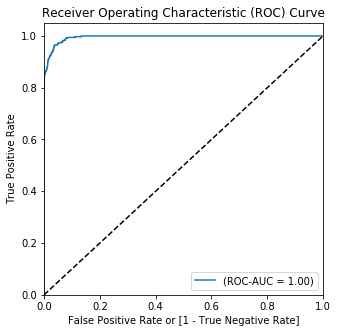

In [51]:
# Predictions on the train set
y_train_pred_rf_unbal = rf_model_unbal.predict(X_train)

# Predicted probability
y_train_pred_proba_rf_ubal = rf_model_unbal.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_rf_ubal)

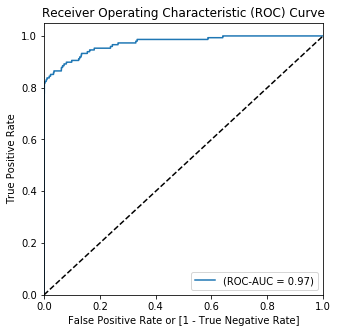

In [52]:
# Making prediction on the test set
y_test_pred_rf_ubal = rf_model_unbal.predict(X_test)

# Predicted probability
y_test_pred_proba_rf_unbal = rf_model_unbal.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_rf_unbal)

In [54]:
##Storing all the Metrics for the Random Forest (unbalanced Dataset) Model
roc_auc_train_rf_unbal = roc_auc_score(y_train, y_train_pred_proba_rf_ubal)
roc_auc_test_rf_unbal = roc_auc_score(y_test, y_test_pred_proba_rf_unbal)
fpr_rf_unbal, tpr_rf_unbal, thresholds_rf_unbal = roc_curve(y_train, y_train_pred_proba_rf_ubal)
threshold_rf_unbal = thresholds_rf_unbal[np.argmax(tpr_rf_unbal -fpr_rf_unbal)]
f1_score_rf_unbal = round(f1_score(y_test, y_test_pred_rf_ubal)*100,2)
recall_rf_unbal = round(recall_score(y_test, y_test_pred_rf_ubal)*100,3)

In [55]:
df_results_rf_unbal = pd.DataFrame({'Model Name': 'Random Forest Unbalanced Dataset','roc_auc_train':roc_auc_train_rf_unbal,
                                       'roc_auc_test':roc_auc_test_rf_unbal,'f1_score':f1_score_rf_unbal,'recall_score':recall_rf_unbal},index=[0])

In [56]:
df_results_rf_unbal

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Random Forest Unbalanced Dataset,0.995057,0.97124,52.05,38.514


**XGBOOST Classifier on Imbalanced Dataset**

In [75]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning reg_lambda

#perform cross validation
grid_params_xgb_unbal = {'reg_lambda':range(2,20,4)}

cv_xgb_unbal = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_unbal = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_unbal,
                            cv=cv_xgb_unbal,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_unbal.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb_unbal.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb_unbal.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 11.5min remaining: 74.9min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 12.1min remaining: 33.3min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 12.2min remaining: 18.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 12.6min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 22.0min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 22.3min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.5min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.9812239209349306
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'reg_lambda': 14}


In [76]:
# scores of GridSearch CV
scores_xgb_unbal = grid_xgb_unbal.cv_results_
pd.DataFrame(scores_xgb_unbal).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,674.017730,4.646740,4.251754,0.325243,2,{'reg_lambda': 2},0.984457,0.982283,0.974086,0.980275,0.004466,3,1.0,1.0,1.0,1.0,0.0
1,713.445868,1.336464,3.940029,0.075765,6,{'reg_lambda': 6},0.984512,0.984022,0.972183,0.980239,0.005700,4,1.0,1.0,1.0,1.0,0.0
2,693.695327,60.605432,3.985418,0.084460,10,{'reg_lambda': 10},0.983523,0.984451,0.974567,0.980847,0.004457,2,1.0,1.0,1.0,1.0,0.0
3,611.063064,7.367389,3.334382,0.318222,14,{'reg_lambda': 14},0.986408,0.983640,0.973624,0.981224,0.005491,1,1.0,1.0,1.0,1.0,0.0
4,604.036906,7.542540,2.764593,0.062644,18,{'reg_lambda': 18},0.985123,0.982897,0.972457,0.980159,0.005521,5,1.0,1.0,1.0,1.0,0.0


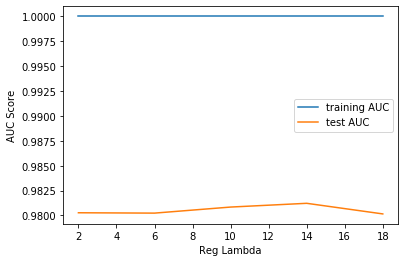

In [77]:
plt.figure()
plt.plot(scores_xgb_unbal["param_reg_lambda"],
         scores_xgb_unbal["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_unbal["param_reg_lambda"],
         scores_xgb_unbal["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Reg Lambda")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [78]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning max_dpth

#perform cross validation
grid_params_xgb1_unbal = {'max_depth':range(1,20,4)}

cv_xgb1_unbal = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb1_unbal = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb1_unbal,
                            cv=cv_xgb1_unbal,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb1_unbal.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb1_unbal.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb1_unbal.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  4.5min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 11.9min remaining: 32.8min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 12.3min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 12.8min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 16.9min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 20.5min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.8min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.983104577417906
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'max_depth': 1}


In [79]:
# scores of GridSearch CV
scores_xgb1_unbal = grid_xgb1_unbal.cv_results_
pd.DataFrame(scores_xgb1_unbal).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,261.269756,1.999082,1.738002,0.043162,1,{'max_depth': 1},0.989802,0.978046,0.981465,0.983105,0.004937,1,0.998435,0.998938,0.999208,0.99886,0.00032
1,710.011732,7.606667,4.751626,0.098600,5,{'max_depth': 5},0.985427,0.982719,0.976506,0.981551,0.003734,4,1.000000,1.000000,1.000000,1.00000,0.00000
2,735.266245,15.742617,4.170164,0.370591,9,{'max_depth': 9},0.988053,0.980934,0.972591,0.980526,0.006319,5,1.000000,1.000000,1.000000,1.00000,0.00000
3,658.483430,108.791838,3.315454,0.287988,13,{'max_depth': 13},0.987355,0.982825,0.975883,0.982021,0.004718,2,1.000000,1.000000,1.000000,1.00000,0.00000
4,499.448930,11.393163,2.732020,0.046141,17,{'max_depth': 17},0.987355,0.982825,0.975883,0.982021,0.004718,2,1.000000,1.000000,1.000000,1.00000,0.00000


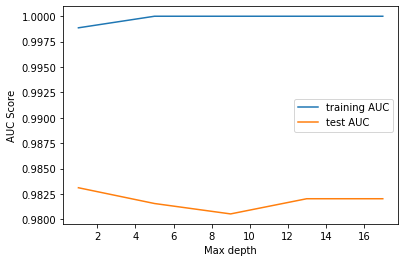

In [80]:
plt.figure()
plt.plot(scores_xgb1_unbal["param_max_depth"],
         scores_xgb1_unbal["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb1_unbal["param_max_depth"],
         scores_xgb1_unbal["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Max depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [81]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning gamma

#perform cross validation
grid_params_xgb2_unbal = {'gamma':[i/10.0 for i in range(0,5)]}

cv_xgb2_unbal = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb2_unbal = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb2_unbal,
                            cv=cv_xgb2_unbal,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb2_unbal.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb2_unbal.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb2_unbal.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 11.2min remaining: 73.0min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 12.0min remaining: 33.0min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 12.2min remaining: 18.3min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 12.6min remaining: 11.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 21.9min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 22.2min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.4min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.98120917553219
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'gamma': 0.3}


In [82]:
# scores of GridSearch CV
scores_xgb2_unbal = grid_xgb2_unbal.cv_results_
pd.DataFrame(scores_xgb2_unbal).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,664.645176,8.074077,4.267572,0.239099,0,{'gamma': 0.0},0.982453,0.981419,0.975881,0.979918,0.002885,4,1.0,1.0,1.0,1.0,0.0
1,717.288175,5.160716,2.767255,0.213130,0.1,{'gamma': 0.1},0.984076,0.980189,0.973284,0.979183,0.004463,5,1.0,1.0,1.0,1.0,0.0
2,705.569423,53.556983,2.289537,0.375215,0.2,{'gamma': 0.2},0.983975,0.983412,0.975149,0.980846,0.004034,2,1.0,1.0,1.0,1.0,0.0
3,621.784932,11.201619,1.465411,0.183873,0.3,{'gamma': 0.3},0.985541,0.983489,0.974597,0.981209,0.004750,1,1.0,1.0,1.0,1.0,0.0
4,597.695645,5.779923,1.118015,0.103706,0.4,{'gamma': 0.4},0.985415,0.981917,0.974814,0.980715,0.004411,3,1.0,1.0,1.0,1.0,0.0


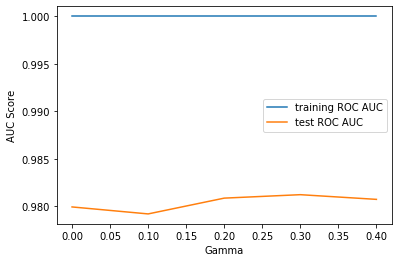

In [83]:
plt.figure()
plt.plot(scores_xgb2_unbal["param_gamma"],
         scores_xgb2_unbal["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb2_unbal["param_gamma"],
         scores_xgb2_unbal["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Gamma")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [85]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning Learning Rate

#perform cross validation
grid_params_xgb3_unbal = {'learning_rate': [i/10.0 for i in range(1,10,2)]}

cv_xgb3_unbal = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb3_unbal = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb3_unbal,
                            cv=cv_xgb3_unbal,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb3_unbal.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb3_unbal.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb3_unbal.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  6.7min remaining: 43.2min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  7.7min remaining: 21.1min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 10.5min remaining: 15.7min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 10.6min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 12.4min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 12.8min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 14.0min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.9799178123836546
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'learning_rate': 0.1}


In [86]:
# scores of GridSearch CV
scores_xgb3_unbal = grid_xgb3_unbal.cv_results_
pd.DataFrame(scores_xgb3_unbal).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,609.187713,3.973114,3.876312,0.023166,0.1,{'learning_rate': 0.1},0.982453,0.981419,0.975881,0.979918,0.002885,1,1.0,1.0,1.0,1.0,0.0
1,437.942137,5.359172,2.698782,0.020554,0.3,{'learning_rate': 0.3},0.983336,0.981323,0.970644,0.978434,0.005570,4,1.0,1.0,1.0,1.0,0.0
2,367.049322,13.614468,2.159224,0.197162,0.5,{'learning_rate': 0.5},0.982145,0.981356,0.972021,0.978507,0.004598,3,1.0,1.0,1.0,1.0,0.0
3,318.961873,11.325752,1.692474,0.249461,0.7,{'learning_rate': 0.7},0.977479,0.985196,0.971194,0.977956,0.005726,5,1.0,1.0,1.0,1.0,0.0
4,237.880728,46.556885,1.266610,0.175600,0.9,{'learning_rate': 0.9},0.981479,0.980593,0.973973,0.978682,0.003349,2,1.0,1.0,1.0,1.0,0.0


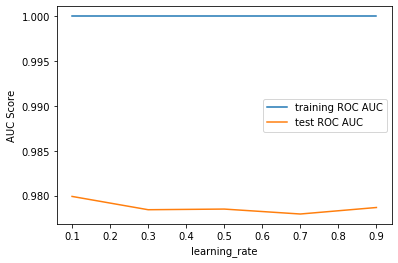

In [87]:
plt.figure()
plt.plot(scores_xgb3_unbal["param_learning_rate"],
         scores_xgb3_unbal["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb3_unbal["param_learning_rate"],
         scores_xgb3_unbal["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("learning_rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [88]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning subsample

#perform cross validation
grid_params_xgb4_unbal = {'subsample':  [i/10.0 for i in range(4,11)]}

cv_xgb4_unbal = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb4_unbal = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb4_unbal,
                            cv=cv_xgb4_unbal,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb4_unbal.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb4_unbal.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb4_unbal.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed: 16.6min remaining: 22.2min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed: 17.5min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 18.5min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 24.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 24.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 24.6min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.981471232302968
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'subsample': 0.8}


In [89]:
# scores of GridSearch CV
scores_xgb4_unbal = grid_xgb4_unbal.cv_results_
pd.DataFrame(scores_xgb4_unbal).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,469.263525,4.047341,3.676818,0.066071,0.4,{'subsample': 0.4},0.982982,0.983455,0.970905,0.979114,0.005808,6,1.0,1.0,1.0,1.0,0.0
1,508.005395,7.283763,3.664198,0.019963,0.5,{'subsample': 0.5},0.986674,0.980804,0.969500,0.978993,0.007127,7,1.0,1.0,1.0,1.0,0.0
2,530.190751,15.504827,3.755571,0.047207,0.6,{'subsample': 0.6},0.982762,0.980405,0.976170,0.979779,0.002727,5,1.0,1.0,1.0,1.0,0.0
3,534.093392,5.561243,3.715398,0.055028,0.7,{'subsample': 0.7},0.986734,0.979743,0.973748,0.980075,0.005307,3,1.0,1.0,1.0,1.0,0.0
4,558.958317,7.505733,3.769543,0.100926,0.8,{'subsample': 0.8},0.984884,0.981725,0.977804,0.981471,0.002896,1,1.0,1.0,1.0,1.0,0.0


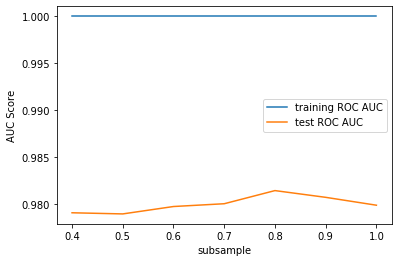

In [90]:
plt.figure()
plt.plot(scores_xgb4_unbal["param_subsample"],
         scores_xgb4_unbal["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb4_unbal["param_subsample"],
         scores_xgb4_unbal["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("subsample")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [91]:
##Optimal Param grid based on initial hyperparam tuning

final_param_grid_xgb_unb = {
    'max_dpth':[1,2],
    'learning_rate':[0.1,0.2],
    'gamma':[0.3],
    'reg_lambda':[13,14],
    'subsample': [0.8]
}



cv_xgb_unbal_final = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_unbal_final = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = final_param_grid_xgb_unb,
                            cv=cv_xgb_unbal_final,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_unbal_final.fit(X_train,y_train)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Unbalanced Dataset: ', grid_xgb_unbal_final.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Unbalanced Dataset: ', grid_xgb_unbal_final.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed: 21.4min remaining: 21.4min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed: 21.5min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 32.1min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 32.2min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 32.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 32.3min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.9822176763011372
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'gamma': 0.3, 'learning_rate': 0.1, 'max_dpth': 1, 'reg_lambda': 13, 'subsample': 0.8}


In [57]:
## Creating the Final XGBOOST model using the above hyperparameters
xgb_unbal_final = xgb.XGBClassifier(objective='binary:logistic' 
                            ,seed = 42
                            ,learning_rate = 0.1
                            ,gamma = 0.3
                            ,max_depth =1
                            ,reg_lambda = 13
                            ,subsample = 0.8
                            )

# Fitting the model on train dataset
xgb_unbal_final.fit(X_train, y_train)

XGBClassifier(gamma=0.3, max_depth=1, reg_lambda=13, seed=42, subsample=0.8)

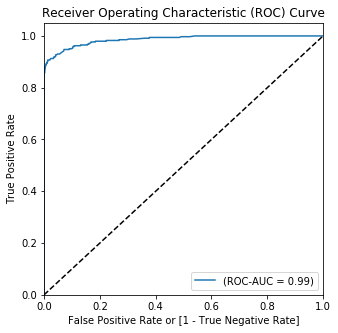

In [58]:
# Predictions on the train set
y_train_pred_xgb_unbal = xgb_unbal_final.predict(X_train)

# Predicted probability
y_train_pred_proba_xgb_ubal = xgb_unbal_final.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_ubal)

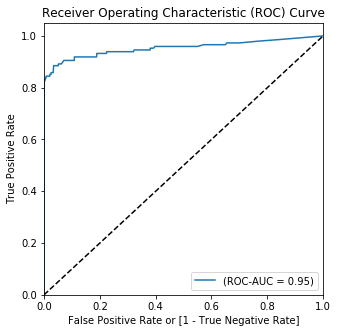

In [59]:
# Making prediction on the test set
y_test_pred_xgb_ubal = xgb_unbal_final.predict(X_test)

# Predicted probability
y_test_pred_proba_xgb_unbal = xgb_unbal_final.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xgb_unbal)

In [61]:
##Storing all the Metrics for XGBOOST (unbalanced Dataset) Model
roc_auc_train_xgb_unbal = roc_auc_score(y_train, y_train_pred_proba_xgb_ubal)
roc_auc_test_xgb_unbal = roc_auc_score(y_test, y_test_pred_proba_xgb_unbal)
fpr_xgb_unbal, tpr_xgb_unbal, thresholds_xgb_unbal = roc_curve(y_train, y_train_pred_proba_xgb_ubal)
threshold_xgb_unbal = thresholds_xgb_unbal[np.argmax(tpr_xgb_unbal -fpr_xgb_unbal)]
f1_score_xgb_unbal = round(f1_score(y_test, y_test_pred_xgb_ubal)*100,2)
recall_xgb_unbal = round(recall_score(y_test, y_test_pred_xgb_ubal)*100,3)

In [62]:
df_results_log_xgb_unbal = pd.DataFrame({'Model Name': 'XGBOOST imbalanced data','roc_auc_train':roc_auc_train_xgb_unbal,
                                        'roc_auc_test':roc_auc_test_xgb_unbal,'f1_score':f1_score_xgb_unbal,'recall_score':recall_xgb_unbal},index=[0])

In [63]:
df_results_log_xgb_unbal

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,XGBOOST imbalanced data,0.986032,0.953337,75.76,67.568


In [187]:
pd.set_option("display.max_colwidth", -1)

In [189]:
##Printing metrics for models build on Imbalanced dataset
pd.concat([df_results_log_xgb_unbal,df_results_rf_unbal,df_results_dtr_unbal,df_results_log_l2_unbal,df_results_log_l1_unbal])

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,XGBOOST imbalanced data,0.986032,0.953337,75.76,67.568
0,Random Forest Unbalanced Dataset,0.995057,0.971240,52.05,38.514
0,Decision Tree Unbalanced Dataset,0.991862,0.953052,66.22,66.216
0,Logistic Regression imbalanced data (L2 Regularisation),0.986872,0.973580,61.28,48.649
0,Logistic Regression imbalanced data (L1 Regularisation),0.987023,0.972378,72.94,62.838


### Printing the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 17
3rd Top var = 12


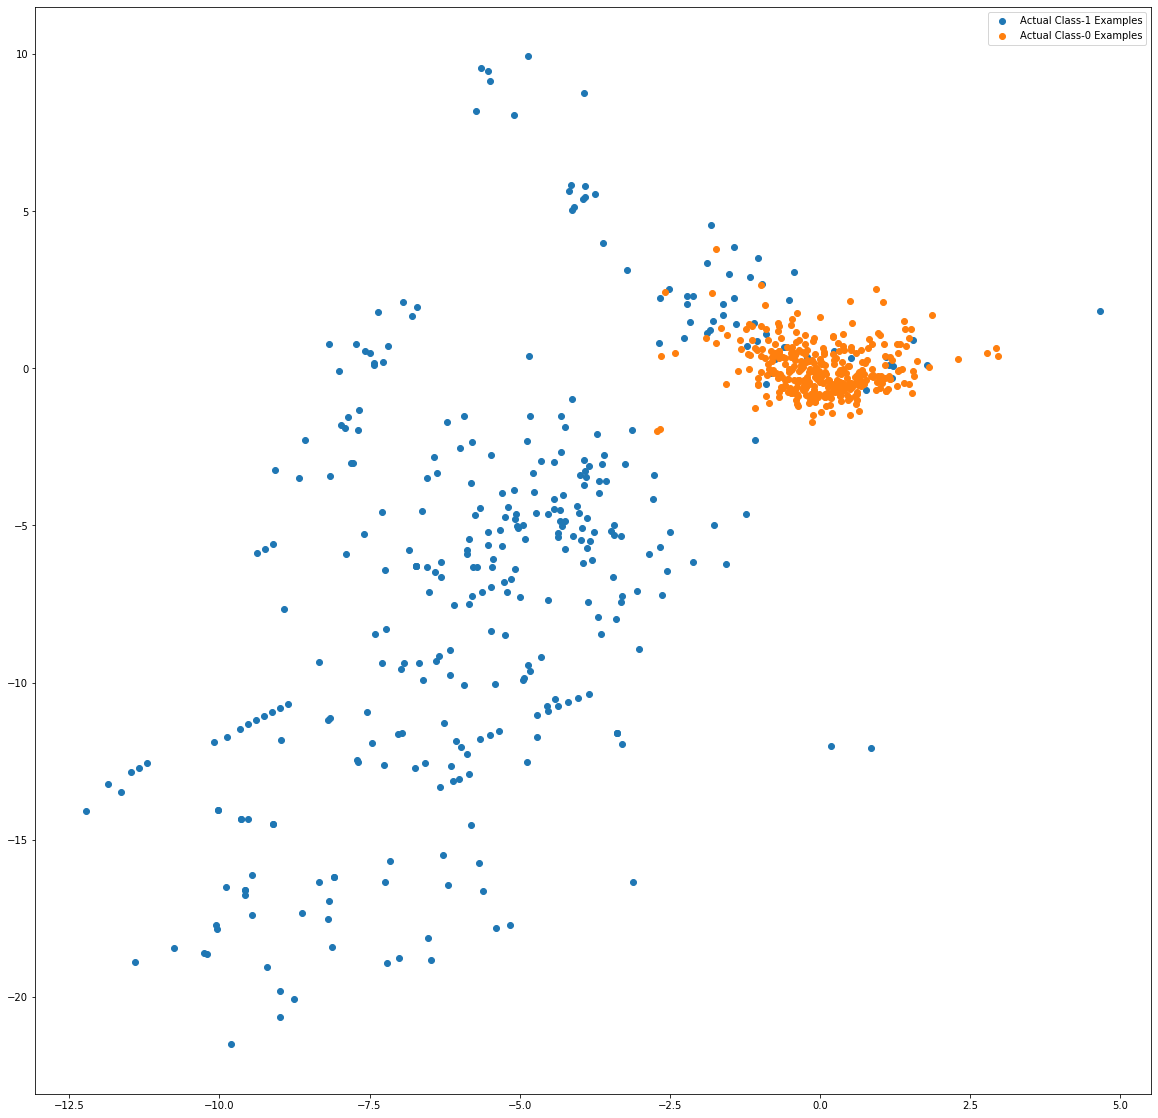

In [78]:
var_imp = []
for i in rf_model_unbal.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(rf_model_unbal.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(rf_model_unbal.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(rf_model_unbal.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-17 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(rf_model_unbal.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(rf_model_unbal.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Performing class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [91]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler

RNOver = RandomOverSampler(random_state = 42)

X_rnover , y_rnover = RNOver.fit_resample(X_train,y_train)

In [92]:
# checking for Class balance after 
y_rnover.value_counts()/y_rnover.shape

1    0.5
0    0.5
Name: Class, dtype: float64

In [93]:
print("After OverSampling, Fraud rate : {}% \n".format(round(sum(y_rnover==1)/len(y_rnover)*100,2)))

After OverSampling, Fraud rate : 50.0% 



**Logistic Regression L1 (Balanced Data) using Random Oversampling**

In [85]:
#performing cross validation

solvers_l1_ovr = ['liblinear', 'saga']
penalty_l1_ovr = ['l1']
c_values_l1_ovr = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid_l1_ovr = dict(solver=solvers_l1_ovr,penalty=penalty_l1_ovr,C=c_values_l1_ovr)

cv_l1_ovr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_l1_ovr = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l1_ovr,
                            cv=cv_l1_ovr,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_l1_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression Randomly Oversampled Dataset (L1): ', grid_l1_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression Randomly Oversampled Dataset (L1): ', grid_l1_ovr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.5min finished


Best ROC AUC score for Logistic Regression Randomly Oversampled Dataset (L1):  0.9898985936273148
Best hyperparameters for Logistic Regression Randomly Oversampled Dataset (L1):  {'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}


In [86]:
# Instantiating the Logistic Regression model with best hyperparams
logL1_reg_ovr_model = LogisticRegression(C=1000.0 , penalty = 'l1',solver = 'saga')

# Fitting the model on train dataset
logL1_reg_ovr_model.fit(X_rnover, y_rnover)

LogisticRegression(C=1000.0, penalty='l1', solver='saga')

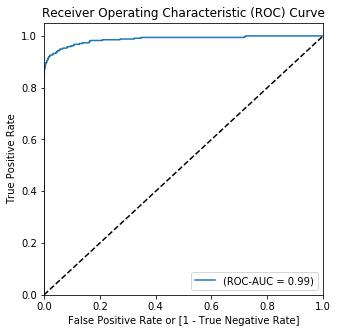

In [87]:
# Predictions on the train set
y_train_pred_ovr = logL1_reg_imb_model.predict(X_rnover)

# Predicted probability for train set
y_train_pred_proba_ovr = logL1_reg_imb_model.predict_proba(X_rnover)[:,1]

# Plot the ROC curve
draw_roc(y_rnover, y_train_pred_proba_ovr)

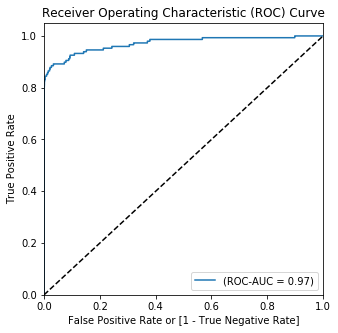

In [88]:
# Making prediction on the test set
y_test_pred_ovr = logL1_reg_ovr_model.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_ovr = logL1_reg_ovr_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_ovr)

In [94]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l1_ovr = roc_auc_score(y_rnover, y_train_pred_proba_ovr)
roc_auc_test_l1_ovr = roc_auc_score(y_test, y_test_pred_proba_ovr)
fpr_l1_ovr, tpr_l1_ovr, thresholds_l1_ovr = roc_curve(y_rnover, y_train_pred_proba_ovr)
threshold_l1_ovr = thresholds_l1_ovr[np.argmax(tpr_l1_ovr - fpr_l1_ovr)]
f1_score_l1_ovr = round(f1_score(y_test, y_test_pred_ovr)*100,2)
recall_l1_ovr = round(recall_score(y_test, y_test_pred_ovr)*100,3)

In [95]:
df_results_log_l1_ovr = pd.DataFrame({'Model Name': 'Logistic Regression Random Oversampled data (L1 Regularisation)','roc_auc_train':roc_auc_train_l1_ovr,
                                        'roc_auc_test':roc_auc_test_l1_ovr,'f1_score':f1_score_l1_ovr,'recall_score':recall_l1_ovr},index=[0])

In [96]:
df_results_log_l1_ovr

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression Random Oversampled data (L...,0.986871,0.971021,11.33,87.838


**Logistic Regression with L2 Regularisation for Random Oversampled Dataset**

In [137]:
#Hyperparameter tuning
# Performing cross validation

solvers_l2_ovr = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty_l2_ovr = ['l2']
c_values_l2_ovr = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid_l2_ovr = dict(solver=solvers_l2_ovr,penalty=penalty_l2_ovr,C=c_values_l2_ovr)

cv_l2_ovr = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logcv_l2_ovr = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l2_ovr,
                            cv=cv_l2_ovr,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_logcv_l2_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression Random Oversampled Dataset (L2): ', grid_logcv_l2_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression Random Oversampled Dataset (L2): ', grid_logcv_l2_ovr.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.9min finished


Best ROC AUC score for Logistic Regression Random Oversampled Dataset (L2):  0.9899136135872932
Best hyperparameters for Logistic Regression Random Oversampled Dataset (L2):  {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [97]:
# Instantiating the Logistic Regression model with best hyperparams
logL2_reg_ovr_model = LogisticRegression(C=1000.0 , penalty = 'l2',solver = 'newton-cg')

# Fitting the model on train dataset
logL2_reg_ovr_model.fit(X_rnover, y_rnover)


LogisticRegression(C=1000.0, solver='newton-cg')

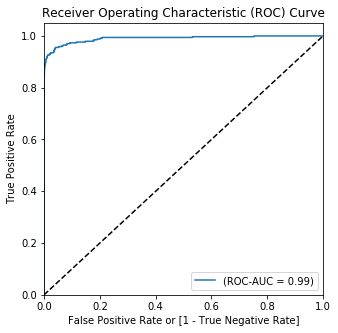

In [98]:
# Predictions on the train set
y_train_pred_l2_ovr = logL2_reg_ovr_model.predict(X_rnover)

# Predicted probability for train set
y_train_pred_proba_l2_ovr = logL2_reg_ovr_model.predict_proba(X_rnover)[:,1]

# Plot the ROC curve
draw_roc(y_rnover, y_train_pred_proba_l2_ovr)

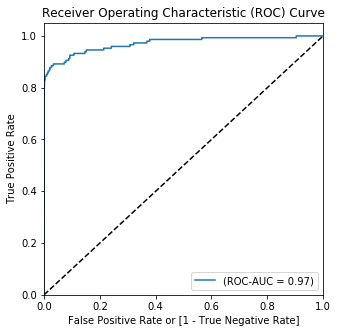

In [99]:
# Making prediction on the test set
y_test_pred_l2_ovr = logL2_reg_ovr_model.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_l2_ovr = logL2_reg_ovr_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_l2_ovr)

In [100]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l2_ovr = roc_auc_score(y_rnover, y_train_pred_proba_ovr)
roc_auc_test_l2_ovr = roc_auc_score(y_test, y_test_pred_proba_ovr)
fpr_l2_ovr, tpr_l2_ovr, thresholds_l2_ovr = roc_curve(y_rnover, y_train_pred_proba_ovr)
threshold_l2_ovr = thresholds_l2_ovr[np.argmax(tpr_l2_ovr - fpr_l2_ovr)]
f1_score_l2_ovr = round(f1_score(y_test, y_test_pred_l2_ovr)*100,2)
recall_l2_ovr = round(recall_score(y_test, y_test_pred_l2_ovr)*100,3)

In [101]:
df_results_log_l2_ovr = pd.DataFrame({'Model Name': 'Logistic Regression Random Oversampled data (L2 Regularisation)','roc_auc_train':roc_auc_train_l2_ovr,
                                        'roc_auc_test':roc_auc_test_l2_ovr,'f1_score':f1_score_l2_ovr,'recall_score':recall_l2_ovr},index=[0])

In [102]:
df_results_log_l2_ovr

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression Random Oversampled data (L...,0.986871,0.971021,11.34,87.838


**Decision Tree Random Oversampling**

In [175]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning Max_depth 

#perform cross validation
grid_params_dectr_ovr = {'max_depth': range(1, 50,5)
                        }
cv_dtr_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_ovr = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_ovr,
                            cv=cv_dtr_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Random Oversampled Dataset: ', grid_dtrcls_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Random Oversampled Dataset: ', grid_dtrcls_ovr.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   27.2s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   35.5s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   38.9s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.3s finished


Best ROC AUC score for Decision Tree Random Oversampled Dataset:  0.9997238310501076
Best hyperparameters for Decision Tree Random Oversampled Dataset:  {'max_depth': 26}


In [176]:
# scores of GridSearch CV
scores_dtr_ovr = grid_dtrcls_ovr.cv_results_
pd.DataFrame(scores_dtr_ovr).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.919203,0.039907,0.085437,0.002487,1,{'max_depth': 1},0.928716,0.929025,0.927721,0.928487,0.000556,10,0.928373,0.928218,0.928870,0.928487,0.000278
1,8.592225,0.099840,0.092753,0.002154,6,{'max_depth': 6},0.998021,0.997190,0.998018,0.997743,0.000391,9,0.997987,0.997276,0.998084,0.997782,0.000360
2,10.281377,0.509894,0.098736,0.003257,11,{'max_depth': 11},0.999482,0.999395,0.999448,0.999442,0.000036,8,0.999669,0.999631,0.999678,0.999659,0.000020
3,11.165033,0.438049,0.099067,0.004702,16,{'max_depth': 16},0.999533,0.999528,0.999727,0.999596,0.000092,7,0.999894,0.999904,0.999921,0.999906,0.000011
4,12.140792,0.027110,0.091755,0.002154,21,{'max_depth': 21},0.999588,0.999656,0.999738,0.999661,0.000061,6,0.999977,0.999975,0.999990,0.999981,0.000007


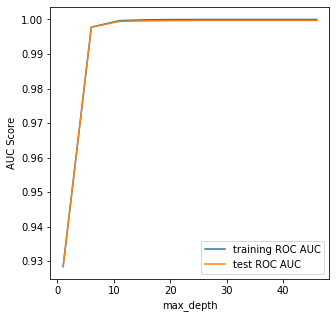

In [178]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_ovr["param_max_depth"],
         scores_dtr_ovr["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_ovr["param_max_depth"],
         scores_dtr_ovr["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [179]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  min_samples_leaf

#perform cross validation
grid_params_dectr1_ovr = {'min_samples_leaf': range(5, 400, 40)}
cv_dtr1_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls1_ovr = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr1_ovr,
                            cv=cv_dtr1_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls1_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Random Oversampled Dataset: ', grid_dtrcls1_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Random Oversampled Dataset: ', grid_dtrcls1_ovr.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   33.4s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   35.4s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   43.4s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.5s finished


Best ROC AUC score for Decision Tree Unbalanced Dataset:  0.999752444575647
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'min_samples_leaf': 45}


In [180]:
# scores of GridSearch CV
scores_dtr_ovr1 = grid_dtrcls1_ovr.cv_results_
pd.DataFrame(scores_dtr_ovr1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.357634,0.239765,0.091423,0.004484,5,{'min_samples_leaf': 5},0.999802,0.999657,0.999739,0.999733,0.000059,2,0.999993,0.999993,0.999995,0.999994,7.265479e-07
1,10.647864,0.569376,0.095080,0.008318,45,{'min_samples_leaf': 45},0.999738,0.999759,0.999761,0.999752,0.000011,1,0.999932,0.999955,0.999918,0.999935,1.512732e-05
2,11.385226,0.489384,0.101063,0.010844,85,{'min_samples_leaf': 85},0.999661,0.999613,0.999673,0.999649,0.000026,3,0.999865,0.999875,0.999877,0.999872,5.192131e-06
3,11.243273,0.760205,0.095412,0.001881,125,{'min_samples_leaf': 125},0.999571,0.999563,0.999629,0.999587,0.000030,5,0.999800,0.999765,0.999776,0.999780,1.435285e-05
4,10.957703,0.400483,0.099401,0.012884,165,{'min_samples_leaf': 165},0.999674,0.999585,0.999660,0.999640,0.000039,4,0.999801,0.999754,0.999806,0.999787,2.340805e-05


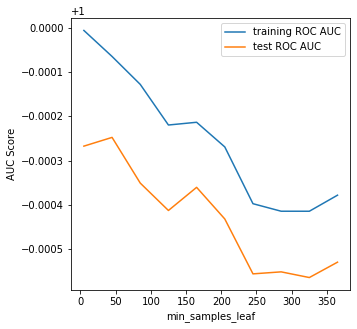

In [181]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_ovr1["param_min_samples_leaf"],
         scores_dtr_ovr1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_ovr1["param_min_samples_leaf"],
         scores_dtr_ovr1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [182]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  min_samples_split

#perform cross validation
grid_params_dectr2_ovr = {'min_samples_split': range(20, 200, 20)}
cv_dtr2_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls2_ovr = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr2_ovr,
                            cv=cv_dtr2_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls2_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Random Oversampled Dataset: ', grid_dtrcls2_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Random Oversampled Dataset: ', grid_dtrcls2_ovr.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:   28.3s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   40.2s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:   41.7s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   42.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   49.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   49.4s finished


Best ROC AUC score for Decision Tree Unbalanced Dataset:  0.9997186212440962
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'min_samples_split': 20}


In [183]:
# scores of GridSearch CV
scores_dtr_ovr2 = grid_dtrcls2_ovr.cv_results_
pd.DataFrame(scores_dtr_ovr2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.720129,0.184721,0.103722,0.009601,20,{'min_samples_split': 20},0.999797,0.999601,0.999759,0.999719,0.000085,1,1.0,1.0,1.0,1.0,0.0
1,13.582497,0.761765,0.088099,0.002860,40,{'min_samples_split': 40},0.999797,0.999601,0.999759,0.999719,0.000085,1,1.0,1.0,1.0,1.0,0.0
2,13.381687,0.239997,0.097738,0.004534,60,{'min_samples_split': 60},0.999797,0.999601,0.999759,0.999719,0.000085,1,1.0,1.0,1.0,1.0,0.0
3,13.042568,0.544594,0.095411,0.000470,80,{'min_samples_split': 80},0.999797,0.999601,0.999759,0.999719,0.000085,1,1.0,1.0,1.0,1.0,0.0
4,13.672881,0.219815,0.099400,0.007741,100,{'min_samples_split': 100},0.999797,0.999601,0.999759,0.999719,0.000085,1,1.0,1.0,1.0,1.0,0.0


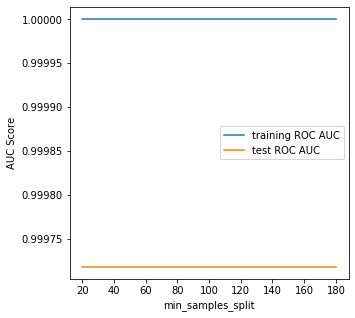

In [184]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_ovr2["param_min_samples_split"],
         scores_dtr_ovr2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_ovr2["param_min_samples_split"],
         scores_dtr_ovr2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [186]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  max_leaf_nodes

#perform cross validation
grid_params_dectr3_ovr = {'max_leaf_nodes': range(5, 400, 15)}
cv_dtr3_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls3_ovr = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr3_ovr,
                            cv=cv_dtr3_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls3_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Random Oversampled Dataset: ', grid_dtrcls3_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Random Oversampled Dataset: ', grid_dtrcls3_ovr.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:  1.9min remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.0min finished


Best ROC AUC score for Decision Tree Unbalanced Dataset:  0.9997186212440962
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'max_leaf_nodes': 170}


In [187]:
# scores of GridSearch CV
scores_dtr_ovr3 = grid_dtrcls3_ovr.cv_results_
pd.DataFrame(scores_dtr_ovr3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.800166,0.133367,0.095079,0.012196,5,{'max_leaf_nodes': 5},0.969236,0.969470,0.969632,0.969446,0.000163,27,0.969555,0.969434,0.969356,0.969449,0.000082
1,7.204258,0.225790,0.090093,0.003848,20,{'max_leaf_nodes': 20},0.991796,0.991345,0.991449,0.991530,0.000193,26,0.991881,0.991421,0.991419,0.991574,0.000217
2,7.939550,0.615519,0.099734,0.012050,35,{'max_leaf_nodes': 35},0.994127,0.994990,0.996827,0.995315,0.001126,25,0.994192,0.995191,0.996856,0.995413,0.001099
3,8.796878,0.450339,0.090092,0.000940,50,{'max_leaf_nodes': 50},0.998231,0.998081,0.998115,0.998142,0.000064,24,0.998209,0.998136,0.998222,0.998189,0.000038
4,9.095198,0.133696,0.097739,0.005873,65,{'max_leaf_nodes': 65},0.999346,0.999370,0.999323,0.999346,0.000019,23,0.999431,0.999392,0.999425,0.999416,0.000017


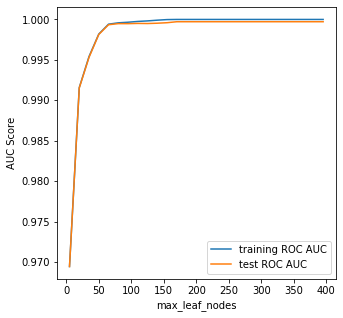

In [188]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_ovr3["param_max_leaf_nodes"],
         scores_dtr_ovr3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_ovr3["param_max_leaf_nodes"],
         scores_dtr_ovr3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_leaf_nodes")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [189]:
## Optimal Hyper parameter tuning for Decision tree classifier
## 

#perform cross validation
opt_grid_params_dectr_ovr = {'max_leaf_nodes': [170],
                            'min_samples_split': [20,40],
                             'min_samples_leaf':[45,50],
                             'max_depth':[26],
                             'criterion': ["entropy", "gini"]                             
                            }
opt_cv_dtr_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_dtrcls_ovr = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = opt_grid_params_dectr_ovr,
                            cv=opt_cv_dtr_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_dtrcls_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree Random Oversampled Dataset: ', opt_grid_dtrcls_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree Random Oversampled Dataset: ', opt_grid_dtrcls_ovr.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   25.3s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   25.4s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   35.0s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:   35.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   35.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   35.9s finished


Best ROC AUC score for Decision Tree Unbalanced Dataset:  0.999763074935438
Best hyperparameters for Decision Tree Unbalanced Dataset:  {'criterion': 'entropy', 'max_depth': 26, 'max_leaf_nodes': 170, 'min_samples_leaf': 50, 'min_samples_split': 20}


In [103]:
##Final Decision Tree Model with optimal Hyperparameters

dtr_model_ovr = DecisionTreeClassifier(random_state=42,
                                      max_leaf_nodes = 170,
                                      min_samples_split = 20,
                                      criterion = 'entropy',
                                      max_depth=26,
                                      min_samples_leaf = 50
                                     )
# Fitting the model on train dataset
dtr_model_ovr.fit(X_rnover, y_rnover)

DecisionTreeClassifier(criterion='entropy', max_depth=26, max_leaf_nodes=170,
                       min_samples_leaf=50, min_samples_split=20,
                       random_state=42)

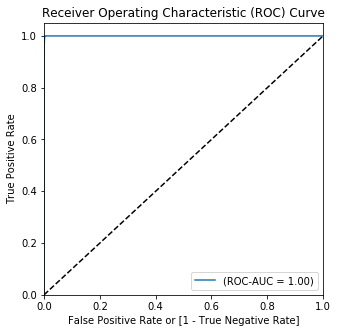

In [104]:
# Predictions on the train set
y_train_pred_dtr_ovr = dtr_model_ovr.predict(X_rnover)

# Predicted probability
y_train_pred_proba_dtr_ovr = dtr_model_ovr.predict_proba(X_rnover)[:,1]

# Plot the ROC curve
draw_roc(y_rnover, y_train_pred_proba_dtr_ovr)

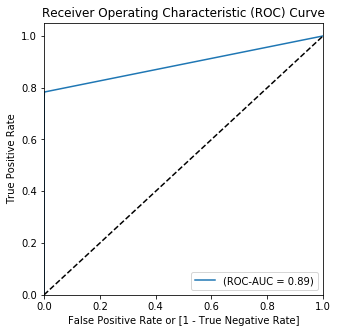

In [105]:
# Making prediction on the test set
y_test_pred_dtr_ovr = dtr_model_ovr.predict(X_test)

# Predicted probability
y_test_pred_proba_dtr_ovr = dtr_model_ovr.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_dtr_ovr)

In [106]:
##Storing all the Metrics for the Decision Tree (Random Oversampling) Model
roc_auc_train_dtr_ovr = roc_auc_score(y_rnover, y_train_pred_proba_dtr_ovr)
roc_auc_test_dtr_ovr = roc_auc_score(y_test, y_test_pred_proba_dtr_ovr)
fpr_dtr_ovr, tpr_dtr_ovr, thresholds_dtr_ovr = roc_curve(y_rnover, y_train_pred_proba_dtr_ovr)
threshold_dtr_ovr = thresholds_dtr_ovr[np.argmax(tpr_dtr -fpr_dtr)]
f1_score_dtr = round(f1_score(y_test, y_test_pred_dtr_ovr)*100,2)
recall_dtr = round(recall_score(y_test, y_test_pred_dtr_ovr)*100,3)

In [107]:
df_results_dtr_ovr = pd.DataFrame({'Model Name': 'Decision Tree Random Oversampled Data','roc_auc_train':roc_auc_train_dtr_ovr,
                                        'roc_auc_test':roc_auc_test_dtr_ovr,'f1_score':f1_score_dtr,'recall_score':recall_dtr},index=[0])

In [108]:
df_results_dtr_ovr

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Decision Tree Random Oversampled Data,0.999943,0.891458,45.76,78.378


**XGBOOST Random OverSampled Dataset**

In [198]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning reg_lambda

#perform cross validation
grid_params_xgb_ovr = {'reg_lambda':range(2,20,4)}

cv_xgb_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_ovr = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_ovr,
                            cv=cv_xgb_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 21.7min remaining: 140.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 21.8min remaining: 59.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 21.8min remaining: 32.8min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 21.9min remaining: 19.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 40.2min remaining: 20.1min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 40.3min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 40.4min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.9999933185572828
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'reg_lambda': 6}


In [199]:
# scores of GridSearch CV
scores_xgb_ovr = grid_xgb_ovr.cv_results_
pd.DataFrame(scores_xgb_ovr).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1275.303876,2.817945,8.210048,0.182292,2,{'reg_lambda': 2},1.0,0.999996,0.999981,0.999992,0.000008,4,1.0,1.0,1.0,1.0,0.0
1,1286.123611,1.190517,7.778535,0.105643,6,{'reg_lambda': 6},1.0,0.999994,0.999986,0.999993,0.000006,1,1.0,1.0,1.0,1.0,0.0
2,1223.692067,93.939111,7.633807,0.076067,10,{'reg_lambda': 10},1.0,0.999993,0.999984,0.999992,0.000007,3,1.0,1.0,1.0,1.0,0.0
3,1093.217194,0.092742,7.432453,0.115226,14,{'reg_lambda': 14},1.0,0.999994,0.999984,0.999993,0.000007,2,1.0,1.0,1.0,1.0,0.0
4,1094.411697,0.479164,6.699949,0.118481,18,{'reg_lambda': 18},1.0,0.999992,0.999983,0.999992,0.000007,5,1.0,1.0,1.0,1.0,0.0


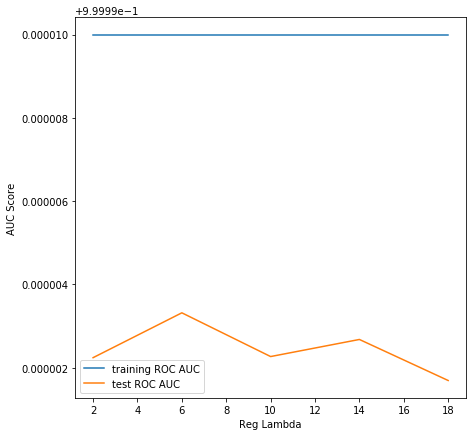

In [203]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_ovr["param_reg_lambda"],
         scores_xgb_ovr["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_ovr["param_reg_lambda"],
         scores_xgb_ovr["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Reg Lambda")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [206]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning max_depth

#perform cross validation
grid_params_xgb_ovr1 = {'max_depth':range(1,20,4)}

cv_xgb_ovr1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_ovr1 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_ovr1,
                            cv=cv_xgb_ovr1,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_ovr1.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr1.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  8.2min remaining: 53.0min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 29.0min remaining: 79.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 29.5min remaining: 44.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 30.0min remaining: 26.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 38.0min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 48.7min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 49.4min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.9999944584887414
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'max_depth': 17}


In [207]:
# scores of GridSearch CV
scores_xgb_ovr1 = grid_xgb_ovr1.cv_results_
pd.DataFrame(scores_xgb_ovr1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,473.964817,1.881702,3.645203,0.043730,1,{'max_depth': 1},0.999659,0.999599,0.999601,0.999620,0.000028,5,0.999617,0.999634,0.999633,0.999628,0.000008
1,1710.586020,11.392741,11.620591,0.079255,5,{'max_depth': 5},1.000000,0.999998,0.999982,0.999993,0.000008,4,1.000000,1.000000,1.000000,1.000000,0.000000
2,1736.501907,30.035809,10.609470,0.659927,9,{'max_depth': 9},1.000000,1.000000,0.999980,0.999993,0.000009,3,1.000000,1.000000,1.000000,1.000000,0.000000
3,1566.195056,285.432105,8.282028,0.802210,13,{'max_depth': 13},1.000000,1.000000,0.999983,0.999994,0.000008,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,1173.554493,16.309844,6.626946,0.075693,17,{'max_depth': 17},1.000000,1.000000,0.999983,0.999994,0.000008,1,1.000000,1.000000,1.000000,1.000000,0.000000


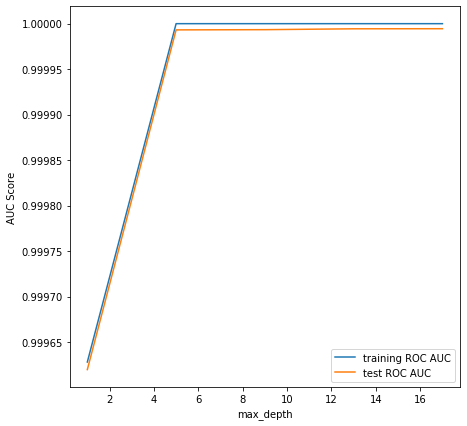

In [208]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_ovr1["param_max_depth"],
         scores_xgb_ovr1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_ovr1["param_max_depth"],
         scores_xgb_ovr1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [215]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning gamma

#perform cross validation
grid_params_xgb_ovr2 = {'gamma':[i/10.0 for i in range(0,5)]}

cv_xgb_ovr2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_ovr2 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_ovr2,
                            cv=cv_xgb_ovr2,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_ovr2.fit(X_rnover,y_rnover,verbose = True)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 20.9min remaining: 135.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 20.9min remaining: 57.4min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 21.0min remaining: 31.4min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 21.0min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 38.9min remaining: 19.5min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 39.0min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 39.0min finished


Best ROC AUC score for XGBOOST Unbalanced Dataset:  0.999993655829452
Best hyperparameters for XGBOOST Unbalanced Dataset:  {'gamma': 0.2}


In [216]:
# scores of GridSearch CV
scores_xgb_ovr2 = grid_xgb_ovr2.cv_results_
pd.DataFrame(scores_xgb_ovr2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1232.024524,6.131988,8.361138,0.365866,0,{'gamma': 0.0},1.0,0.999997,0.999984,0.999994,0.000007,2,1.0,1.0,1.0,1.0,0.0
1,1232.518166,3.201962,7.492882,0.108951,0.1,{'gamma': 0.1},1.0,0.999997,0.999983,0.999993,0.000007,3,1.0,1.0,1.0,1.0,0.0
2,1176.876436,81.203451,6.343252,0.112622,0.2,{'gamma': 0.2},1.0,0.999995,0.999986,0.999994,0.000006,1,1.0,1.0,1.0,1.0,0.0
3,1069.933983,3.329281,5.515252,0.173400,0.3,{'gamma': 0.3},1.0,0.999994,0.999982,0.999992,0.000008,4,1.0,1.0,1.0,1.0,0.0
4,1068.513111,1.077791,5.088394,0.229196,0.4,{'gamma': 0.4},1.0,0.999993,0.999983,0.999992,0.000007,5,1.0,1.0,1.0,1.0,0.0


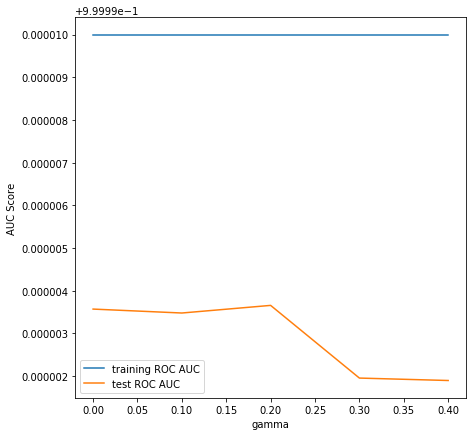

In [217]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_ovr2["param_gamma"],
         scores_xgb_ovr2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_ovr2["param_gamma"],
         scores_xgb_ovr2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("gamma")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [28]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning learning_rate

#perform cross validation
grid_params_xgb_ovr3 = {'learning_rate': [i/10.0 for i in range(1,10,2)]}

cv_xgb_ovr3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_ovr3 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_ovr3,
                            cv=cv_xgb_ovr3,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_ovr3.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr3.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr3.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 16.0min remaining: 103.9min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 18.5min remaining: 50.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 22.1min remaining: 33.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 22.2min remaining: 19.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 30.5min remaining: 15.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 31.4min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 32.6min finished


Best ROC AUC score for XGBOOST Random Oversampled Dataset:  0.9999943768405495
Best hyperparameters for XGBOOST Random Oversampled Dataset:  {'learning_rate': 0.3}


In [29]:
# scores of GridSearch CV
scores_xgb_ovr3 = grid_xgb_ovr3.cv_results_
pd.DataFrame(scores_xgb_ovr3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1298.361835,0.583116,8.842726,0.038941,0.1,{'learning_rate': 0.1},1.000000,0.999997,0.999984,0.999994,0.000007,3,1.0,1.0,1.0,1.0,0.0
1,1088.467731,7.580372,7.371100,0.008969,0.3,{'learning_rate': 0.3},1.000000,0.999996,0.999987,0.999994,0.000005,1,1.0,1.0,1.0,1.0,0.0
2,910.090471,31.585369,5.879561,0.529194,0.5,{'learning_rate': 0.5},1.000000,0.999999,0.999984,0.999994,0.000007,2,1.0,1.0,1.0,1.0,0.0
3,783.845507,21.936232,3.972835,0.606758,0.7,{'learning_rate': 0.7},1.000000,0.999997,0.999978,0.999992,0.000010,4,1.0,1.0,1.0,1.0,0.0
4,656.961892,56.551991,2.968571,0.454853,0.9,{'learning_rate': 0.9},0.999993,0.999982,0.999987,0.999987,0.000004,5,1.0,1.0,1.0,1.0,0.0


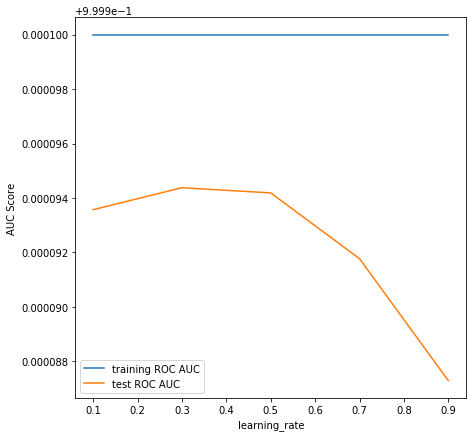

In [30]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_ovr3["param_learning_rate"],
         scores_xgb_ovr3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_ovr3["param_learning_rate"],
         scores_xgb_ovr3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("learning_rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [32]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning subsample

#perform cross validation
grid_params_xgb_ovr4 = {'subsample':  [i/10.0 for i in range(4,11)]}

cv_xgb_ovr4 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_ovr4 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_ovr4,
                            cv=cv_xgb_ovr4,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_ovr4.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr4.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', grid_xgb_ovr4.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed: 41.3min remaining: 55.1min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed: 42.6min remaining: 32.0min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 43.6min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 57.0min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 57.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 57.5min finished


Best ROC AUC score for XGBOOST Random Oversampled Dataset:  0.9999935693338723
Best hyperparameters for XGBOOST Random Oversampled Dataset:  {'subsample': 1.0}


In [33]:
# scores of GridSearch CV
scores_xgb_ovr4 = grid_xgb_ovr4.cv_results_
pd.DataFrame(scores_xgb_ovr4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1189.513877,2.647414,9.225308,0.060917,0.4,{'subsample': 0.4},1.0,0.999992,0.999985,0.999992,0.000006,6,1.0,1.0,1.0,1.0,0.0
1,1250.263289,5.025025,9.179428,0.252050,0.5,{'subsample': 0.5},1.0,0.999990,0.999988,0.999993,0.000005,5,1.0,1.0,1.0,1.0,0.0
2,1269.494819,25.704257,9.385879,0.278061,0.6,{'subsample': 0.6},1.0,0.999987,0.999985,0.999991,0.000007,7,1.0,1.0,1.0,1.0,0.0
3,1257.473009,1.373799,9.403499,0.069884,0.7,{'subsample': 0.7},1.0,0.999991,0.999989,0.999993,0.000005,4,1.0,1.0,1.0,1.0,0.0
4,1276.882727,4.801905,8.962675,0.200100,0.8,{'subsample': 0.8},1.0,0.999992,0.999989,0.999993,0.000005,2,1.0,1.0,1.0,1.0,0.0


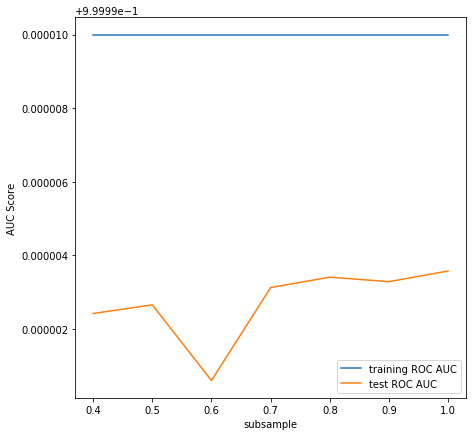

In [34]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_ovr4["param_subsample"],
         scores_xgb_ovr4["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_ovr4["param_subsample"],
         scores_xgb_ovr4["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("subsample")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [36]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning subsample

#perform cross validation
opt_grid_params_xgb_ovr = { 'max_dpth':[17],
    'learning_rate':[0.3,0.4],
    'gamma':[0.2],
    'reg_lambda':[5,6],
    'subsample': [0.9,1.0]}

opt_cv_xgb_ovr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_xgb_ovr = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = opt_grid_params_xgb_ovr,
                            cv=opt_cv_xgb_ovr,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_xgb_ovr.fit(X_rnover,y_rnover)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST Random Oversampled Dataset: ', opt_grid_xgb_ovr.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST Random Oversampled Dataset: ', opt_grid_xgb_ovr.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed: 43.3min remaining: 43.3min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed: 43.8min remaining: 26.3min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 64.3min remaining: 21.4min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 64.4min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 64.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 64.7min finished


Best ROC AUC score for XGBOOST Random Oversampled Dataset:  0.9999936257604984
Best hyperparameters for XGBOOST Random Oversampled Dataset:  {'gamma': 0.2, 'learning_rate': 0.3, 'max_dpth': 17, 'reg_lambda': 6, 'subsample': 0.9}


In [109]:
## Creating the XGBOOST model using the above optimal hyperparameters
xgb_ovr_final = xgb.XGBClassifier(objective='binary:logistic' 
                            ,seed = 42
                            ,learning_rate = 0.3
                            ,gamma = 0.2
                            ,max_depth =17
                            ,reg_lambda = 6
                            ,subsample = 0.9
                            )

# Fitting the model on train dataset
xgb_ovr_final.fit(X_rnover, y_rnover)

XGBClassifier(gamma=0.2, learning_rate=0.3, max_depth=17, reg_lambda=6, seed=42,
              subsample=0.9)

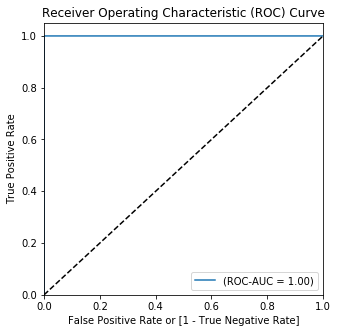

In [110]:
# Predictions on the train set
y_train_pred_xgb_ovr = xgb_ovr_final.predict(X_rnover)

# Predicted probability
y_train_pred_proba_xgb_ovr = xgb_ovr_final.predict_proba(X_rnover)[:,1]

# Plot the ROC curve
draw_roc(y_rnover, y_train_pred_proba_xgb_ovr)

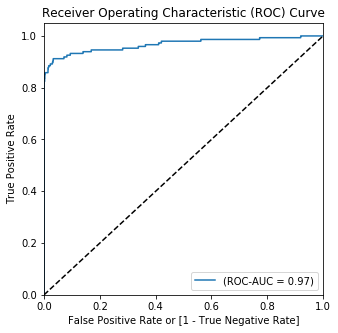

In [111]:
# Making prediction on the test set
y_test_pred_xgb_ovr = xgb_ovr_final.predict(X_test)

# Predicted probability
y_test_pred_proba_xgb_ovr = xgb_ovr_final.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xgb_ovr)

In [112]:
##Storing all the Metrics for the XGBOOST MOdel Randomly Oversampled
roc_auc_train_xgb_ovr = roc_auc_score(y_rnover, y_train_pred_proba_xgb_ovr)
roc_auc_test_xgb_ovr = roc_auc_score(y_test, y_test_pred_proba_xgb_ovr)
fpr_xgb_ovr, tpr_xgb_ovr, thresholds_xgb_ovr = roc_curve(y_rnover, y_train_pred_proba_xgb_ovr)
threshold_dtr_xgb = thresholds_xgb_ovr[np.argmax(tpr_xgb_ovr -fpr_xgb_ovr)]
f1_score_xgb_ovr = round(f1_score(y_test, y_test_pred_xgb_ovr)*100,2)
recall_xgb_ovr = round(recall_score(y_test, y_test_pred_xgb_ovr)*100,3)

In [113]:
df_results_xgb_ovr = pd.DataFrame({'Model Name': 'XGBOOST Classifier Random Oversampled Data','roc_auc_train':roc_auc_train_xgb_ovr,
                                        'roc_auc_test':roc_auc_test_xgb_ovr,'f1_score':f1_score_xgb_ovr,'recall_score':recall_xgb_ovr},index=[0])

In [114]:
df_results_xgb_ovr

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,XGBOOST Classifier Random Oversampled Data,1.0,0.967454,84.17,79.054


### Print the class distribution after applying SMOTE 

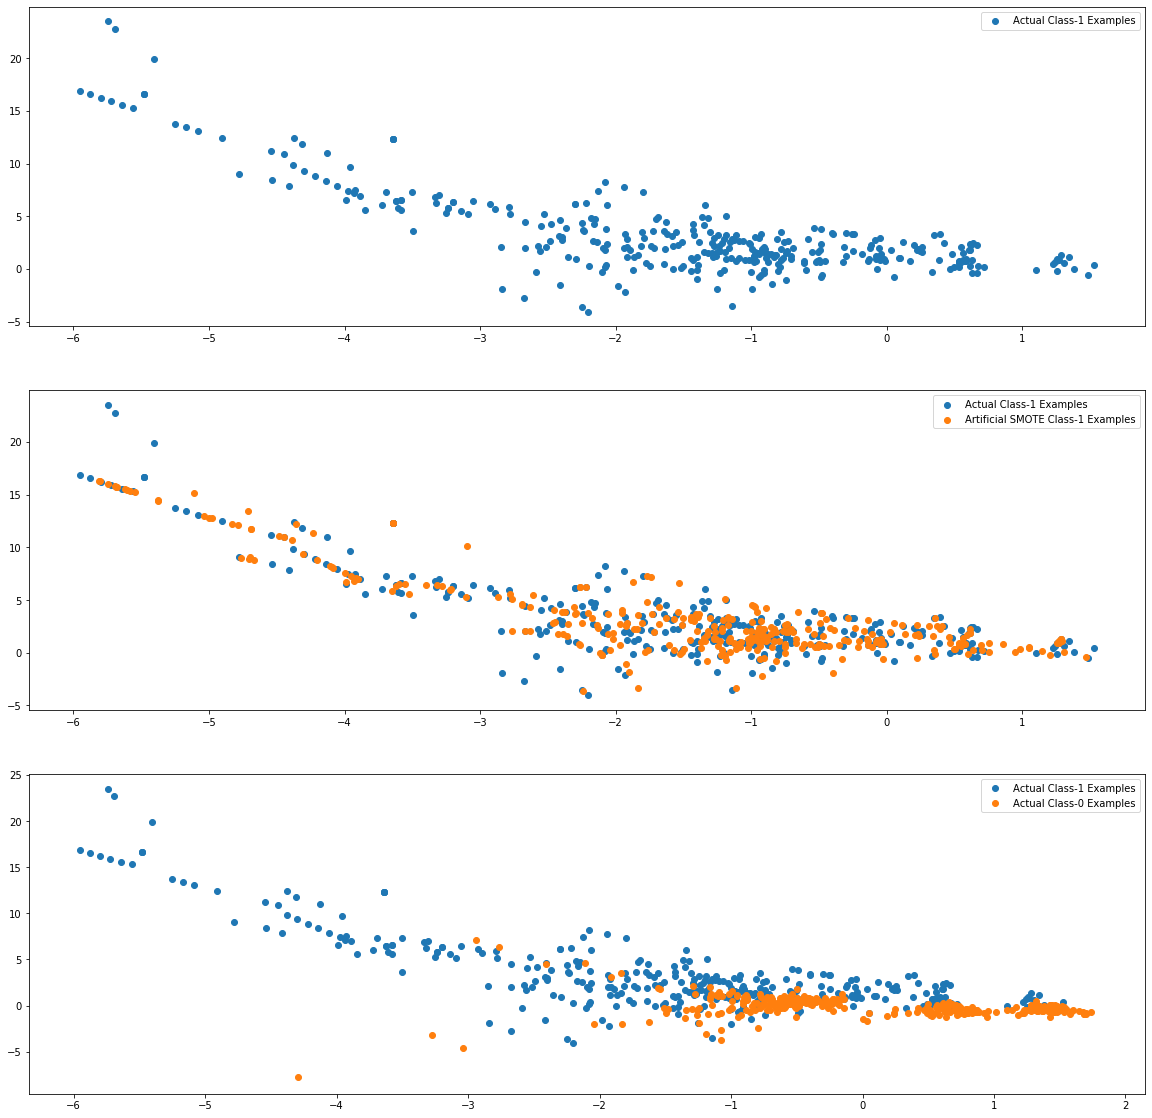

In [24]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [25]:
print("After SMOTE OverSampling, Fraud rate : {}% \n".format(round(sum(y_train_smote==1)/len(y_train_smote)*100,2)))

After SMOTE OverSampling, Fraud rate : 50.0% 



**Logistic Regression L1 (Balanced Data) using SMOTE**

In [30]:
#perform cross validation

solvers_l1_smote = ['liblinear', 'saga']
penalty_l1_smote = ['l1']
c_values_l1_smote = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid_l1_smote = dict(solver=solvers_l1_smote,penalty=penalty_l1_smote,C=c_values_l1_smote)

cv_l1_smote = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_l1_smote = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l1_smote,
                            cv=cv_l1_smote,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_l1_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression (L1) SMOTE Dataset: ', grid_l1_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression (L1) SMOTE Dataset: ', grid_l1_smote.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.5min finished


Best ROC AUC score for Logistic Regression (L1) SMOTE Dataset:  0.9913528499223119
Best hyperparameters for Logistic Regression (L1) SMOTE Dataset:  {'C': 10000.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [118]:
# Instantiating the Logistic Regression model with best hyperparams
logL1_reg_smote_model = LogisticRegression(C=10000.0 , penalty = 'l1',solver = 'liblinear')

# Fitting the model on train dataset
logL1_reg_smote_model.fit(X_train_smote,y_train_smote)

LogisticRegression(C=10000.0, penalty='l1', solver='liblinear')

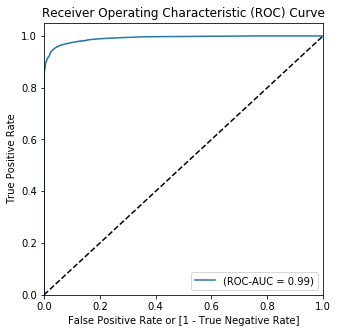

In [119]:
# Predictions on the train set
y_train_pred_smote = logL1_reg_smote_model.predict(X_train_smote)

# Predicted probability for train set
y_train_pred_proba_smote = logL1_reg_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

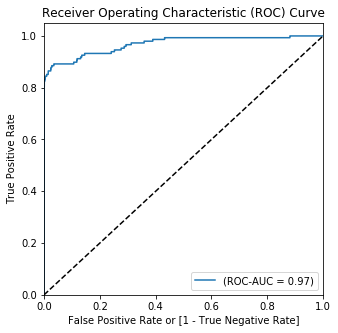

In [120]:
# Making prediction on the test set
y_test_pred_smote = logL1_reg_smote_model.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_smote = logL1_reg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

In [121]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l1_smote = roc_auc_score(y_train_smote, y_train_pred_proba_smote)
roc_auc_test_l1_smote = roc_auc_score(y_test, y_test_pred_proba_smote)
fpr_l1_smote, tpr_l1_smote, thresholds_l1_smote = roc_curve(y_train_smote, y_train_pred_proba_smote)
threshold_l1_smote = thresholds_l1_smote[np.argmax(tpr_l1_smote - fpr_l1_smote)]
f1_score_l1_smote = round(f1_score(y_test, y_test_pred_smote)*100,2)
recall_l1_smote = round(recall_score(y_test, y_test_pred_smote)*100,3)

In [122]:
df_results_log_l1_smote = pd.DataFrame({'Model Name': 'Logistic Regression SMOTE Oversampled data (L1 Regularisation)','roc_auc_train':roc_auc_train_l1_smote,
                                        'roc_auc_test':roc_auc_test_l1_smote,'f1_score':f1_score_l1_smote,'recall_score':recall_l1_smote},index=[0])

In [123]:
df_results_log_l1_smote

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression SMOTE Oversampled data (L1...,0.991365,0.968544,10.86,87.162


**Logistic Regression L2 (Balanced Data) using SMOTE**

In [87]:
#perform cross validation

solvers_l2_smote = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty_l2_smote = ['l2']
c_values_l2_smote = list(np.power(10.0, np.arange(-5, 5))) ##np.logspace(-3,3,10) 

grid_l2_smote = dict(solver=solvers_l2_smote,penalty=penalty_l2_smote,C=c_values_l2_smote)

cv_l2_smote = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logcv_l2_smote = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l2_smote,
                            cv=cv_l2_smote,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_logcv_l2_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression SMOTE Dataset (L2): ', grid_logcv_l2_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression SMOTE Dataset (L2): ', grid_logcv_l2_smote.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.1min finished


Best ROC AUC score for Logistic Regression SMOTE Dataset (L2):  0.9913695192565569
Best hyperparameters for Logistic Regression SMOTE Dataset (L2):  {'C': 10000.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [124]:
# Instantiating the Logistic Regression model with best hyperparams
logL2_reg_smote_model = LogisticRegression(C=10000.0 , penalty = 'l2',solver = 'lbfgs')

# Fitting the model on train dataset
logL2_reg_smote_model.fit(X_train_smote,y_train_smote)

LogisticRegression(C=10000.0)

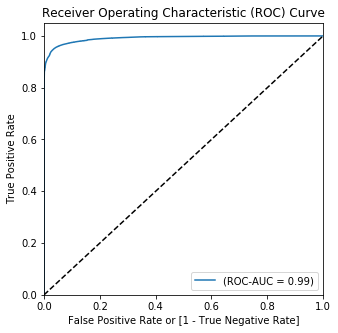

In [125]:
# Predictions on the train set
y_train_pred_smotel2 = logL2_reg_smote_model.predict(X_train_smote)

# Predicted probability for train set
y_train_pred_proba_smotel2 = logL2_reg_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smotel2)

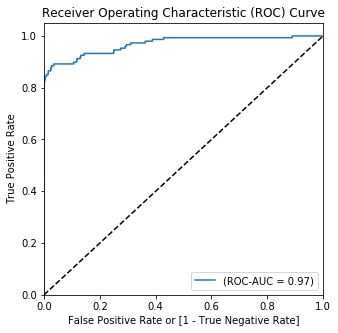

In [126]:
# Making prediction on the test set
y_test_pred_smotel2 = logL2_reg_smote_model.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_smotel2 = logL2_reg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smotel2)

In [127]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l2_smote = roc_auc_score(y_train_smote, y_train_pred_proba_smotel2)
roc_auc_test_l2_smote = roc_auc_score(y_test, y_test_pred_proba_smotel2)
fpr_l2_smote, tpr_l2_smote, thresholds_l2_smote = roc_curve(y_train_smote, y_train_pred_proba_smotel2)
threshold_l2_smote = thresholds_l2_smote[np.argmax(tpr_l2_smote - fpr_l2_smote)]
f1_score_l2_smote = round(f1_score(y_test, y_test_pred_smotel2)*100,2)
recall_l2_smote = round(recall_score(y_test, y_test_pred_smotel2)*100,3)

In [128]:
df_results_log_l2_smote = pd.DataFrame({'Model Name': 'Logistic Regression SMOTE Oversampled data (L2 Regularisation)','roc_auc_train':roc_auc_train_l2_smote,
                                        'roc_auc_test':roc_auc_test_l2_smote,'f1_score':f1_score_l2_smote,'recall_score':recall_l2_smote},index=[0])

In [129]:
df_results_log_l2_smote

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression SMOTE Oversampled data (L2...,0.991386,0.968502,10.91,87.838


**Decision Tree Balanced Dataset SMOTE**

In [94]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning Max_depth 

#perform cross validation
grid_params_dectr_smote = {'max_depth': range(1, 50,5)
                        }
cv_dtr_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_smote = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_smote,
                            cv=cv_dtr_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_smote.fit(X_train_smote,y_train_smote)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree SMOTE Dataset: ', grid_dtrcls_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree SMOTE Dataset: ', grid_dtrcls_smote.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.3min remaining:   44.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.7min remaining:   30.3s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.8min remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


Best ROC AUC score for Decision Tree SMOTE Dataset:  0.9980324639497482
Best hyperparameters for Decision Tree SMOTE Dataset:  {'max_depth': 11}


In [95]:
# scores of GridSearch CV
scores_dtr_smote = grid_dtrcls_smote.cv_results_
pd.DataFrame(scores_dtr_smote).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.040596,0.034491,0.089092,0.001695,1,{'max_depth': 1},0.930344,0.930314,0.928640,0.929766,0.000796,10,0.929526,0.929658,0.930381,0.929855,0.000376
1,15.268924,0.078181,0.108378,0.013732,6,{'max_depth': 6},0.994192,0.993803,0.993691,0.993895,0.000215,9,0.994581,0.994005,0.994183,0.994256,0.000241
2,23.548767,0.375454,0.101064,0.001244,11,{'max_depth': 11},0.997822,0.998235,0.998040,0.998032,0.000169,1,0.999388,0.999385,0.999481,0.999418,0.000045
3,29.348218,1.018147,0.104056,0.004178,16,{'max_depth': 16},0.997314,0.997571,0.997003,0.997296,0.000232,7,0.999758,0.999867,0.999836,0.999820,0.000046
4,35.378413,1.234653,0.111037,0.004771,21,{'max_depth': 21},0.997046,0.997665,0.997148,0.997287,0.000271,8,0.999887,0.999963,0.999963,0.999938,0.000036


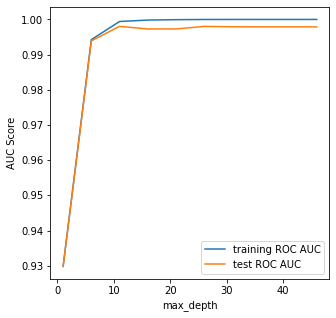

In [96]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_smote["param_max_depth"],
         scores_dtr_smote["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_smote["param_max_depth"],
         scores_dtr_smote["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [97]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  min_samples_leaf

#perform cross validation
grid_params_dectr1_smote = {'min_samples_leaf': range(5, 400, 40)}
cv_dtr1_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls1_smote = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr1_smote,
                            cv=cv_dtr1_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls1_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree SMOTE Dataset: ', grid_dtrcls1_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree SMOTE Dataset: ', grid_dtrcls1_smote.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.5min remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.6min remaining:   29.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.9min remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


Best ROC AUC score for Decision Tree SMOTE Dataset:  0.9989709980623475
Best hyperparameters for Decision Tree SMOTE Dataset:  {'min_samples_leaf': 85}


In [98]:
# scores of GridSearch CV
scores_dtr_smote1 = grid_dtrcls1_smote.cv_results_
pd.DataFrame(scores_dtr_smote1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.979853,0.955183,0.110372,0.006830,5,{'min_samples_leaf': 5},0.998487,0.998569,0.998372,0.998476,0.000081,5,0.999996,0.999996,0.999997,0.999996,3.581933e-07
1,33.987520,2.320078,0.120013,0.014484,45,{'min_samples_leaf': 45},0.998908,0.998984,0.998899,0.998930,0.000038,2,0.999814,0.999817,0.999821,0.999818,2.935395e-06
2,29.601561,2.343922,0.107047,0.010376,85,{'min_samples_leaf': 85},0.999045,0.998995,0.998873,0.998971,0.000073,1,0.999561,0.999574,0.999575,0.999570,6.211922e-06
3,27.312310,1.666488,0.121010,0.024460,125,{'min_samples_leaf': 125},0.998752,0.998835,0.998686,0.998758,0.000061,3,0.999274,0.999337,0.999307,0.999306,2.575047e-05
4,26.460426,1.828990,0.108711,0.004312,165,{'min_samples_leaf': 165},0.998598,0.998653,0.998508,0.998586,0.000060,4,0.999107,0.999109,0.999081,0.999099,1.258114e-05


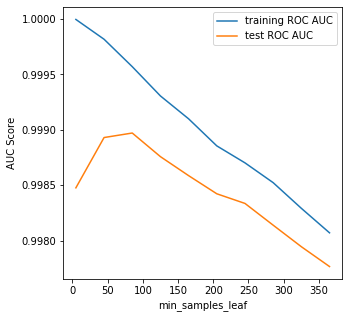

In [99]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_smote1["param_min_samples_leaf"],
         scores_dtr_smote1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_smote1["param_min_samples_leaf"],
         scores_dtr_smote1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [100]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  min_samples_split

#perform cross validation
grid_params_dectr2_smote = {'min_samples_split': range(20, 200, 20)}
cv_dtr2_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls2_smote = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr2_smote,
                            cv=cv_dtr2_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls2_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree SMOTE Dataset: ', grid_dtrcls2_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree SMOTE Dataset: ', grid_dtrcls2_smote.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:  1.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  1.9min remaining:   56.2s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:  1.9min remaining:   33.2s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  2.0min remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.4min finished


Best ROC AUC score for Decision Tree SMOTE Dataset:  0.9988218854388311
Best hyperparameters for Decision Tree SMOTE Dataset:  {'min_samples_split': 120}


In [101]:
# scores of GridSearch CV
scores_dtr_smote2 = grid_dtrcls2_smote.cv_results_
pd.DataFrame(scores_dtr_smote2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.752408,1.412498,0.101395,0.003846,20,{'min_samples_split': 20},0.998146,0.998223,0.998227,0.998199,0.000037,9,0.999999,0.999999,0.999999,0.999999,3.358076e-07
1,37.561579,1.725305,0.125663,0.020554,40,{'min_samples_split': 40},0.998388,0.998519,0.998591,0.998499,0.000084,8,0.999993,0.999995,0.999994,0.999994,8.703792e-07
2,38.044287,0.726630,0.103056,0.003292,60,{'min_samples_split': 60},0.998471,0.998541,0.998612,0.998541,0.000057,7,0.999985,0.999988,0.999986,0.999986,1.067977e-06
3,37.285314,2.052567,0.103391,0.004098,80,{'min_samples_split': 80},0.998521,0.998664,0.998750,0.998645,0.000095,6,0.999979,0.999976,0.999974,0.999976,2.095682e-06
4,38.565558,0.498232,0.105053,0.002488,100,{'min_samples_split': 100},0.998549,0.998770,0.998732,0.998684,0.000097,5,0.999969,0.999965,0.999961,0.999965,3.388231e-06


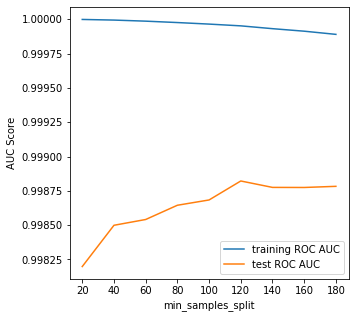

In [102]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_smote2["param_min_samples_split"],
         scores_dtr_smote2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_smote2["param_min_samples_split"],
         scores_dtr_smote2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [103]:
## Hyper parameter tuning for Decision tree classifier
## Tuning  max_leaf_nodes

#perform cross validation
grid_params_dectr3_smote = {'max_leaf_nodes': range(5, 400, 15)}
cv_dtr3_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls3_smote = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr3_smote,
                            cv=cv_dtr3_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls3_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree SMOTE Dataset: ', grid_dtrcls3_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree SMOTE Dataset: ', grid_dtrcls3_smote.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:  2.9min remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.1min finished


Best ROC AUC score for Decision Tree SMOTE Dataset:  0.9982057668193685
Best hyperparameters for Decision Tree SMOTE Dataset:  {'max_leaf_nodes': 245}


In [104]:
# scores of GridSearch CV
scores_dtr_smote3 = grid_dtrcls3_smote.cv_results_
pd.DataFrame(scores_dtr_smote3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.416828,0.188873,0.111702,0.023305,5,{'max_leaf_nodes': 5},0.970222,0.969904,0.969026,0.969717,0.000506,27,0.969475,0.969999,0.970003,0.969826,0.000248
1,11.101985,0.071791,0.099401,0.000470,20,{'max_leaf_nodes': 20},0.987713,0.983577,0.982297,0.984529,0.002311,26,0.987797,0.983469,0.982830,0.984699,0.002206
2,12.752903,0.492273,0.132313,0.022747,35,{'max_leaf_nodes': 35},0.991690,0.991871,0.991725,0.991762,0.000078,25,0.991926,0.992098,0.991897,0.991974,0.000089
3,14.512201,0.317805,0.106050,0.005777,50,{'max_leaf_nodes': 50},0.992315,0.992883,0.992407,0.992535,0.000249,24,0.992573,0.993073,0.992598,0.992748,0.000230
4,14.707346,0.389692,0.117353,0.002050,65,{'max_leaf_nodes': 65},0.992718,0.993293,0.992826,0.992946,0.000249,23,0.993043,0.993494,0.993116,0.993218,0.000198


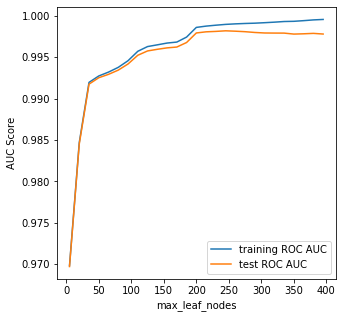

In [105]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_smote3["param_max_leaf_nodes"],
         scores_dtr_smote3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_smote3["param_max_leaf_nodes"],
         scores_dtr_smote3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_leaf_nodes")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [107]:
## Optimal Hyper parameter tuning for Decision tree classifier
## 

#perform cross validation
opt_grid_params_dectr_smote = {'max_leaf_nodes': [230,245],
                            'min_samples_split': [100,120,140],
                             'min_samples_leaf':[85,100],
                             'max_depth':[10,11],
                             'criterion': ["entropy", "gini"]                             
                            }
opt_cv_dtr_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_dtrcls_smote = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = opt_grid_params_dectr_smote,
                            cv=opt_cv_dtr_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_dtrcls_smote.fit(X_train_smote,y_train_smote)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree SMOTE Dataset: ', opt_grid_dtrcls_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree SMOTE Dataset: ', opt_grid_dtrcls_smote.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  7.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  7.4min finished


Best ROC AUC score for Decision Tree SMOTE Dataset:  0.9989266709332769
Best hyperparameters for Decision Tree SMOTE Dataset:  {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 230, 'min_samples_leaf': 85, 'min_samples_split': 100}


In [130]:
##Decision Tree Model with optimal Hyperparameters

dtr_model_smote = DecisionTreeClassifier(random_state=42,
                                      max_leaf_nodes = 230,
                                      min_samples_split = 100,
                                      criterion = 'entropy',
                                      max_depth=11,
                                      min_samples_leaf = 85
                                     )
# Fitting the model on train dataset
dtr_model_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=230,
                       min_samples_leaf=85, min_samples_split=100,
                       random_state=42)

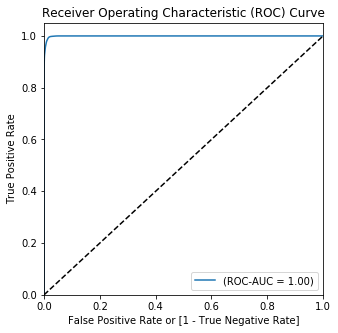

In [131]:
# Predictions on the train set
y_train_pred_smotedtr = dtr_model_smote.predict(X_train_smote)

# Predicted probability for train set
y_train_pred_proba_smotedtr = dtr_model_smote.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smotedtr)

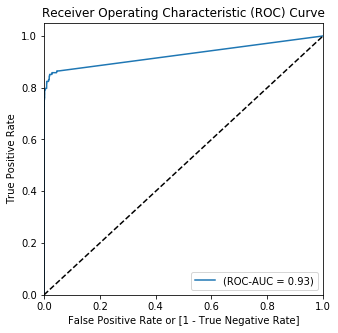

In [132]:
# Making prediction on the test set
y_test_pred_smotedtr = dtr_model_smote.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_smotedtr = dtr_model_smote.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smotedtr)

In [133]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_dtr_smote = roc_auc_score(y_train_smote, y_train_pred_proba_smotedtr)
roc_auc_test_dtr_smote = roc_auc_score(y_test, y_test_pred_proba_smotedtr)
fpr_dtr_smote, tpr_dtr_smote, thresholds_dtr_smote = roc_curve(y_train_smote, y_train_pred_proba_smotedtr)
threshold_dtr_smote = thresholds_dtr_smote[np.argmax(tpr_dtr_smote - fpr_dtr_smote)]
f1_score_dtr_smote = round(f1_score(y_test, y_test_pred_smotedtr)*100,2)
recall_dtr_smote = round(recall_score(y_test, y_test_pred_smotedtr)*100,3)

In [134]:
df_results_dtr_smote = pd.DataFrame({'Model Name': 'Decision Tree SMOTE Dataset','roc_auc_train':roc_auc_train_dtr_smote,
                                        'roc_auc_test':roc_auc_test_dtr_smote,'f1_score':f1_score_dtr_smote,'recall_score':recall_dtr_smote},index=[0])

In [135]:
df_results_dtr_smote

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Decision Tree SMOTE Dataset,0.999387,0.927443,14.29,83.108


**XGBOOST SMOTE Dataset**

In [39]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning reg_lambda

#perform cross validation
grid_params_xgb_smote = {'reg_lambda':range(10,50,4)}

cv_xgb_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_smote = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_smote,
                            cv=cv_xgb_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_smote.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', grid_xgb_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', grid_xgb_smote.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 18.6min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 21.9min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 25.7min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.5min finished


Best ROC AUC score for XGBOOST SMOTE Dataset:  0.9998579229814877
Best hyperparameters for XGBOOST SMOTE Dataset:  {'reg_lambda': 38}


In [40]:
# scores of GridSearch CV
scores_xgb_smote = grid_xgb_smote.cv_results_
pd.DataFrame(scores_xgb_smote).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,307.731701,119.593128,1.462422,0.604638,10,{'reg_lambda': 10},0.999879,0.999770,0.997815,0.999155,0.000948,9,0.999873,0.999829,0.997946,0.999216,0.000898
1,413.997680,115.032513,1.937485,0.563076,14,{'reg_lambda': 14},0.999925,0.999418,0.999866,0.999736,0.000226,6,0.999914,0.999516,0.999916,0.999782,0.000188
2,272.432941,44.968825,1.252317,0.200684,18,{'reg_lambda': 18},0.999537,0.999176,0.999698,0.999471,0.000218,8,0.999532,0.999291,0.999760,0.999528,0.000192
3,379.459514,127.521793,1.787551,0.677507,22,{'reg_lambda': 22},0.999930,0.999390,0.999721,0.999680,0.000222,7,0.999925,0.999483,0.999780,0.999730,0.000184
4,319.361463,148.788499,1.478082,0.759161,26,{'reg_lambda': 26},0.999833,0.996096,0.999832,0.998587,0.001762,10,0.999825,0.996282,0.999886,0.998664,0.001685


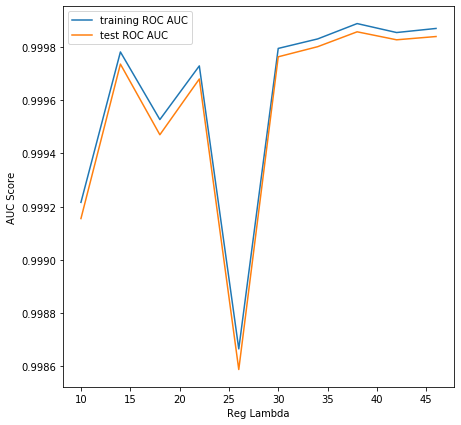

In [41]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_smote["param_reg_lambda"],
         scores_xgb_smote["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_smote["param_reg_lambda"],
         scores_xgb_smote["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Reg Lambda")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [36]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning max_depth

#perform cross validation
grid_params_xgb_smote1 = {'max_depth':range(5,40,5)}

cv_xgb_smote1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_smote1 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_smote1,
                            cv=cv_xgb_smote1,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_smote1.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False
                   )


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', grid_xgb_smote1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', grid_xgb_smote1.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  5.6min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  9.5min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 11.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 14.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 20.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 20.4min finished


Best ROC AUC score for XGBOOST Random Oversampled Dataset:  0.9997313528329818
Best hyperparameters for XGBOOST Random Oversampled Dataset:  {'max_depth': 35}


In [37]:
# scores of GridSearch CV
scores_xgb_smote1 = grid_xgb_smote1.cv_results_
pd.DataFrame(scores_xgb_smote1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,250.907922,55.264067,0.883968,0.327701,5,{'max_depth': 5},0.999555,0.999873,0.999421,0.999616,0.000190,6,0.999534,0.999939,0.999550,0.999674,0.000187
1,197.846438,91.810342,0.459768,0.295184,10,{'max_depth': 10},0.999585,0.999902,0.998723,0.999403,0.000498,7,0.999632,0.999951,0.999045,0.999543,0.000376
2,234.726358,59.257406,0.378988,0.153680,15,{'max_depth': 15},0.999770,0.999863,0.999218,0.999617,0.000285,5,0.999837,0.999906,0.999483,0.999742,0.000185
3,477.583001,302.650394,1.033570,0.948160,20,{'max_depth': 20},0.999999,0.999710,0.999288,0.999666,0.000292,4,1.000000,0.999851,0.999532,0.999794,0.000195
4,331.004304,58.622898,0.419543,0.101357,25,{'max_depth': 25},0.999902,0.999828,0.999299,0.999676,0.000269,3,0.999889,0.999904,0.999540,0.999777,0.000168


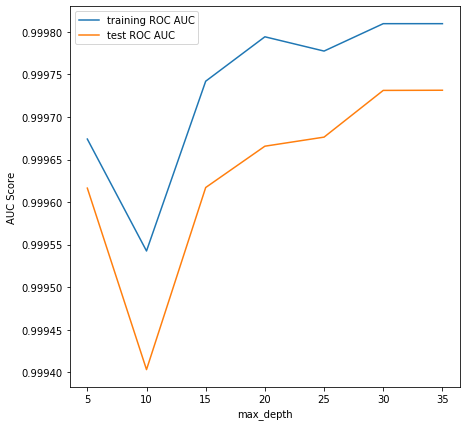

In [38]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_smote1["param_max_depth"],
         scores_xgb_smote1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_smote1["param_max_depth"],
         scores_xgb_smote1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [42]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning gamma

#perform cross validation
grid_params_xgb_smote2 = {'gamma':[i/10.0 for i in range(0,5)]}

cv_xgb_smote2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_smote2 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_smote2,
                            cv=cv_xgb_smote2,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_smote2.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False
                   )


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', grid_xgb_smote2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', grid_xgb_smote2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  4.5min remaining: 29.3min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  5.3min remaining: 14.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  5.6min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  6.2min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  8.4min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  9.0min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.4min finished


Best ROC AUC score for XGBOOST Random Oversampled Dataset:  0.9996484324668112
Best hyperparameters for XGBOOST Random Oversampled Dataset:  {'gamma': 0.0}


In [43]:
# scores of GridSearch CV
scores_xgb_smote2 = grid_xgb_smote2.cv_results_
pd.DataFrame(scores_xgb_smote2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,314.351936,41.428087,1.417285,0.215842,0,{'gamma': 0.0},0.999715,0.999763,0.999468,0.999648,0.000129,1,0.999710,0.999828,0.999530,0.999689,0.000122
1,301.100117,56.107067,1.328204,0.299284,0.1,{'gamma': 0.1},0.999715,0.999763,0.999194,0.999557,0.000258,2,0.999710,0.999828,0.999275,0.999604,0.000238
2,276.720692,54.816797,1.205560,0.285322,0.2,{'gamma': 0.2},0.999750,0.999607,0.999134,0.999497,0.000263,3,0.999747,0.999678,0.999221,0.999549,0.000233
3,227.988329,36.979262,0.867853,0.115928,0.3,{'gamma': 0.3},0.999750,0.999607,0.999134,0.999497,0.000263,5,0.999747,0.999678,0.999221,0.999549,0.000233
4,208.843767,33.076901,0.773136,0.088358,0.4,{'gamma': 0.4},0.999750,0.999607,0.999134,0.999497,0.000263,4,0.999747,0.999678,0.999221,0.999549,0.000233


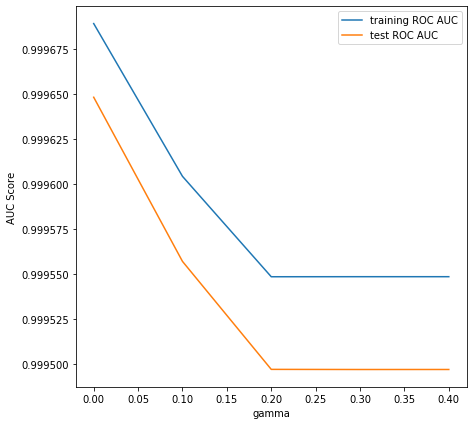

In [44]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_smote2["param_gamma"],
         scores_xgb_smote2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_smote2["param_gamma"],
         scores_xgb_smote2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("gamma")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [45]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning learning_rate

#perform cross validation
grid_params_xgb_smote3 = {'learning_rate': [i/10.0 for i in range(1,10,2)]}

cv_xgb_smote3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_smote3 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_smote3,
                            cv=cv_xgb_smote3,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_smote3.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False
                   )


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', grid_xgb_smote3.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', grid_xgb_smote3.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.8min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.7min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.5min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.8min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.2min finished


Best ROC AUC score for XGBOOST SMOTE Dataset:  0.9997586609720764
Best hyperparameters for XGBOOST SMOTE Dataset:  {'learning_rate': 0.7}


In [46]:
# scores of GridSearch CV
scores_xgb_smote3 = grid_xgb_smote3.cv_results_
pd.DataFrame(scores_xgb_smote3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,280.798730,19.750536,0.918092,0.063018,0.1,{'learning_rate': 0.1},0.999715,0.999763,0.999468,0.999648,0.000129,4,0.999710,0.999828,0.999530,0.999689,0.000122
1,157.452314,43.596345,0.735935,0.164711,0.3,{'learning_rate': 0.3},0.999790,0.999302,0.999929,0.999674,0.000269,3,0.999773,0.999401,0.999965,0.999713,0.000234
2,112.057102,23.801806,0.491953,0.089245,0.5,{'learning_rate': 0.5},0.999571,0.999774,0.999877,0.999741,0.000127,2,0.999581,0.999864,0.999934,0.999793,0.000153
3,90.760139,4.190023,0.452066,0.053703,0.7,{'learning_rate': 0.7},0.999825,0.999610,0.999841,0.999759,0.000105,1,0.999816,0.999709,0.999893,0.999806,0.000075
4,54.721869,4.760046,0.223375,0.019149,0.9,{'learning_rate': 0.9},0.999285,0.999570,0.998966,0.999274,0.000247,5,0.999303,0.999669,0.999060,0.999344,0.000250


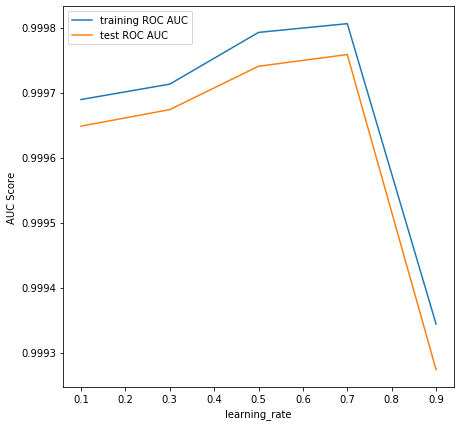

In [47]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_smote3["param_learning_rate"],
         scores_xgb_smote3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_smote3["param_learning_rate"],
         scores_xgb_smote3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("learning_rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [49]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning subsample

#perform cross validation
grid_params_xgb_smote4 = {'subsample':  [i/10.0 for i in range(1,11)]}

cv_xgb_smote4 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_smote4 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_smote4,
                            cv=cv_xgb_smote4,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_smote4.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False
                   )


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', grid_xgb_smote4.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', grid_xgb_smote4.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 11.2min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 13.5min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 16.0min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.2min finished


Best ROC AUC score for XGBOOST SMOTE Dataset:  0.9997597940490253
Best hyperparameters for XGBOOST SMOTE Dataset:  {'subsample': 0.9}


In [50]:
# scores of GridSearch CV
scores_xgb_smote4 = grid_xgb_smote4.cv_results_
pd.DataFrame(scores_xgb_smote4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,147.530558,104.017010,1.082963,0.859913,0.1,{'subsample': 0.1},0.999919,0.995872,0.994525,0.996772,0.002292,10,0.999903,0.996040,0.994685,0.996876,0.002210
1,160.721860,70.152394,1.099915,0.578861,0.2,{'subsample': 0.2},0.997657,0.998295,0.999779,0.998577,0.000889,8,0.997610,0.998387,0.999828,0.998608,0.000919
2,219.772808,86.886468,1.275421,0.547994,0.3,{'subsample': 0.3},0.996953,0.999818,0.999696,0.998822,0.001323,7,0.996902,0.999861,0.999759,0.998841,0.001372
3,273.313690,104.560817,1.634418,0.716346,0.4,{'subsample': 0.4},0.999803,0.997889,0.999871,0.999188,0.000919,6,0.999799,0.998016,0.999921,0.999246,0.000871
4,221.461244,96.803540,1.161579,0.555916,0.5,{'subsample': 0.5},0.999732,0.999693,0.993876,0.997767,0.002752,9,0.999732,0.999758,0.994070,0.997853,0.002675


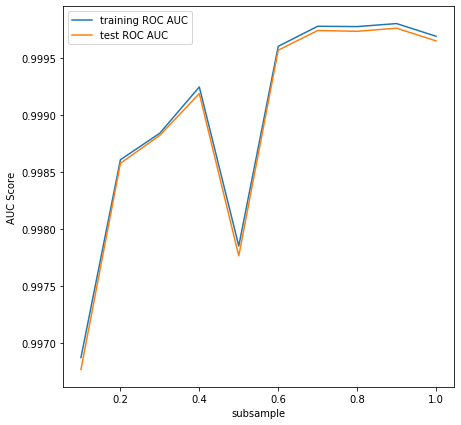

In [51]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_smote4["param_subsample"],
         scores_xgb_smote4["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_smote4["param_subsample"],
         scores_xgb_smote4["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("subsample")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [52]:
## Optimal Hyper parameter tuning for XGBOOST Classifier

#perform cross validation
opt_grid_params_xgb_smote = { 'max_dpth':[30,35],
    'learning_rate':[0.5,0.6,0.7],
    'gamma':[0.0],
    'reg_lambda':[38],
    'subsample': [0.8,0.9]}

opt_cv_xgb_smote = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_xgb_smote = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = opt_grid_params_xgb_smote,
                            cv=opt_cv_xgb_smote,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_xgb_smote.fit(X_train_smote,y_train_smote,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False
                   )


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST SMOTE Dataset: ', opt_grid_xgb_smote.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST SMOTE Dataset: ', opt_grid_xgb_smote.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:  7.3min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  8.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:  9.0min remaining:   49.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.4min finished


Best ROC AUC score for XGBOOST SMOTE Dataset:  0.9998808788856776
Best hyperparameters for XGBOOST SMOTE Dataset:  {'gamma': 0.0, 'learning_rate': 0.7, 'max_dpth': 30, 'reg_lambda': 38, 'subsample': 0.8}


In [26]:
## Creating the XGBOOST model using the above optimal hyperparameters
xgb_smote_final = xgb.XGBClassifier(objective='binary:logistic' 
                            ,seed = 42
                            ,learning_rate = 0.7
                            ,gamma = 0.0
                            ,max_depth =30
                            ,reg_lambda = 38
                            ,subsample = 0.8
                            )

# Fitting the model on train dataset
xgb_smote_final.fit(X_train_smote,y_train_smote)

XGBClassifier(gamma=0.0, learning_rate=0.7, max_depth=30, reg_lambda=38,
              seed=42, subsample=0.8)

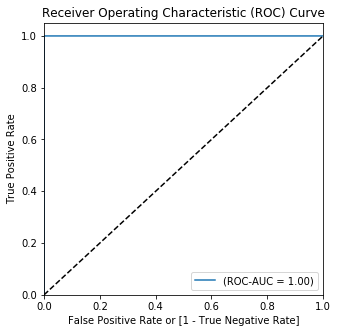

In [29]:
# Predictions on the train set
y_train_pred_xgb_smote = xgb_smote_final.predict(X_train_smote)

# Predicted probability
y_train_pred_proba_xgb_smote = xgb_smote_final.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_xgb_smote)

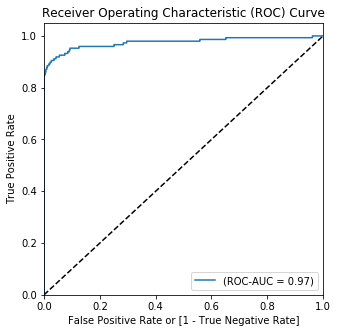

In [30]:
# Making prediction on the test set
y_test_pred_xgb_smote = xgb_smote_final.predict(X_test)

# Predicted probability
y_test_pred_proba_xgb_smote = xgb_smote_final.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xgb_smote)

In [31]:
##Storing all the Metrics for the XGBOOST MOdel Randomly Oversampled
roc_auc_train_xgb_smote = roc_auc_score(y_train_smote, y_train_pred_proba_xgb_smote)
roc_auc_test_xgb_smote = roc_auc_score(y_test, y_test_pred_proba_xgb_smote)
fpr_xgb_smote, tpr_xgb_smote, thresholds_xgb_smote = roc_curve(y_train_smote, y_train_pred_proba_xgb_smote)
threshold_xgb_smote = thresholds_xgb_smote[np.argmax(tpr_xgb_smote -fpr_xgb_smote)]
f1_score_xgb_smote = round(f1_score(y_test, y_test_pred_xgb_smote)*100,2)
recall_xgb_smote = round(recall_score(y_test, y_test_pred_xgb_smote)*100,3)

In [32]:
df_results_xgb_smote = pd.DataFrame({'Model Name': 'XGBOOST Classifier SMOTE Dataset','roc_auc_train':roc_auc_train_xgb_smote,
                                        'roc_auc_test':roc_auc_test_xgb_smote,'f1_score':f1_score_xgb_smote,'recall_score':recall_xgb_smote},index=[0])

In [141]:
df_results_xgb_smote

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,XGBOOST Classifier SMOTE Dataset,1.0,0.974931,82.0,83.108


### Print the class distribution after applying ADASYN

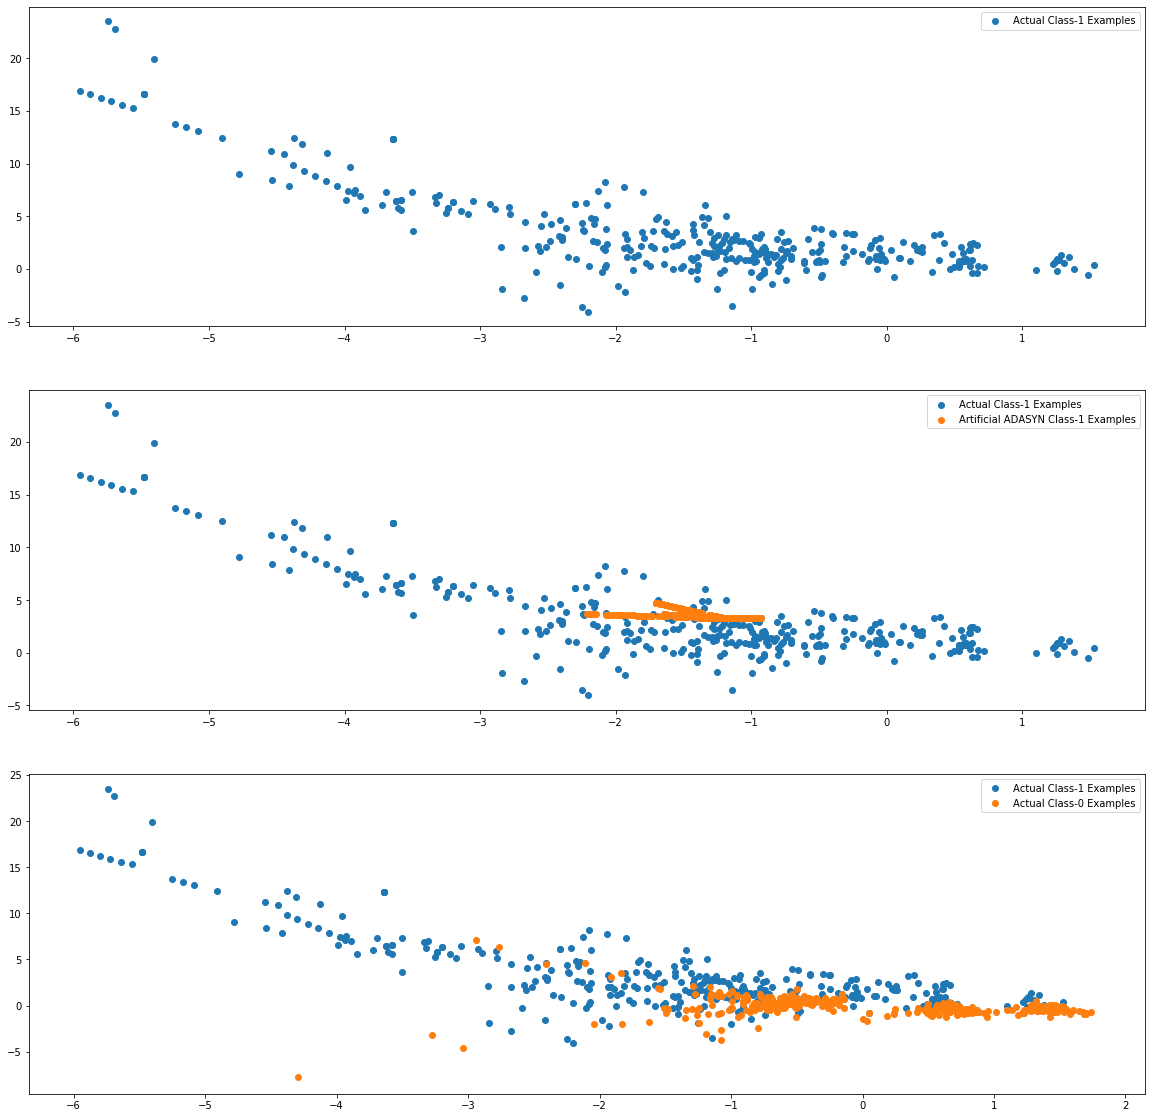

In [149]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [150]:
print("After ADASYN OverSampling, Fraud rate : {}% \n".format(round(sum(y_train_adasyn==1)/len(y_train_adasyn)*100,2)))

After ADASYN OverSampling, Fraud rate : 50.0% 



**Logistic Regression L1 (Balanced Data) using ADASYN**

In [116]:
#perform cross validation

solvers_l1_adasyn = ['liblinear', 'saga']
penalty_l1_adasyn = ['l1']
c_values_l1_adasyn = list(np.power(10.0, np.arange(-6, 6))) ##np.logspace(-3,3,10) 

grid_l1_adasyn = dict(solver=solvers_l1_adasyn,penalty=penalty_l1_adasyn,C=c_values_l1_adasyn)

cv_l1_adasyn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_l1_adasyn = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l1_adasyn,
                            cv=cv_l1_adasyn,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_l1_adasyn.fit(X_train_adasyn,y_train_adasyn)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression (L1) ADASYN Dataset: ', grid_l1_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression (L1) ADASYN Dataset: ', grid_l1_adasyn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.7min finished


Best ROC AUC score for Logistic Regression (L1) ADASYN Dataset:  0.9685495682052242
Best hyperparameters for Logistic Regression (L1) ADASYN Dataset:  {'C': 100000.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [144]:
# Instantiating the Logistic Regression model with best hyperparams
logL1_reg_adasyn_model = LogisticRegression(C=100000.0 , penalty = 'l1',solver = 'liblinear')

# Fitting the model on train dataset
logL1_reg_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=100000.0, penalty='l1', solver='liblinear')

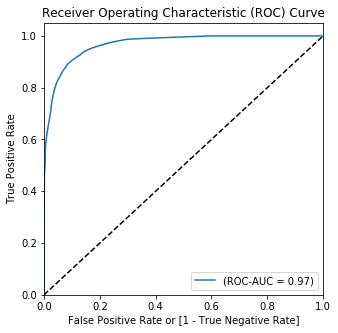

In [151]:
# Predictions on the train set
y_train_pred_adasyn = logL1_reg_adasyn_model.predict(X_train_adasyn)

# Predicted probability for train set
y_train_pred_proba_adasyn = logL1_reg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba_adasyn)

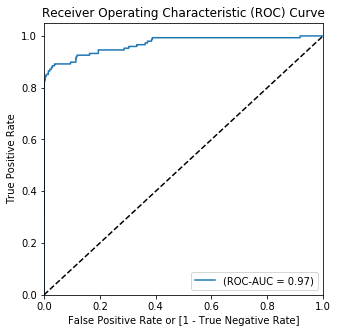

In [152]:
# Making prediction on the test set
y_test_pred_adasyn = logL1_reg_adasyn_model.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_adasyn = logL1_reg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_adasyn)

In [154]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l1_adasyn = roc_auc_score(y_train_adasyn, y_train_pred_proba_adasyn)
roc_auc_test_l1_adasyn = roc_auc_score(y_test, y_test_pred_proba_adasyn)
fpr_l1_adasyn, tpr_l1_adasyn, thresholds_l1_adasyn = roc_curve(y_train_adasyn, y_train_pred_proba_adasyn)
threshold_l1_adasyn = thresholds_l1_adasyn[np.argmax(tpr_l1_adasyn - fpr_l1_adasyn)]
f1_score_l1_adasyn = round(f1_score(y_test, y_test_pred_adasyn)*100,2)
recall_l1_adasyn = round(recall_score(y_test, y_test_pred_adasyn)*100,3)

In [155]:
df_results_log_l1_adasyn = pd.DataFrame({'Model Name': 'Logistic Regression ADASYN Oversampled data (L1 Regularisation)','roc_auc_train':roc_auc_train_l1_adasyn,
                                        'roc_auc_test':roc_auc_test_l1_adasyn,'f1_score':f1_score_l1_adasyn,'recall_score':recall_l1_adasyn},index=[0])

In [156]:
df_results_log_l1_adasyn

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression ADASYN Oversampled data (L...,0.968571,0.968664,3.59,89.189


**Logistic Regression with L2 Regularisation using ADASYN**

In [125]:
#perform cross validation

solvers_l2_adasyn = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty_l2_adasyn = ['l2']
c_values_l2_adasyn = list(np.power(10.0, np.arange(-6, 6))) ##np.logspace(-3,3,10) 

grid_l2_adasyn = dict(solver=solvers_l2_adasyn,penalty=penalty_l2_adasyn,C=c_values_l2_adasyn)

cv_l2_adasyn = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logcv_l2_adasyn = GridSearchCV(estimator = LogisticRegression(random_state=42),
                            param_grid = grid_l2_adasyn,
                            cv=cv_l2_adasyn,
                            n_jobs=-1,
                            verbose = 1,
                            scoring='roc_auc'
                           )


#perform hyperparameter tuning
grid_logcv_l2_adasyn.fit(X_train_adasyn,y_train_adasyn)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Logistic Regression ADASYN Dataset (L2): ', grid_logcv_l2_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Logistic Regression ADASYN Dataset (L2): ', grid_logcv_l2_adasyn.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.0min finished


Best ROC AUC score for Logistic Regression ADASYN Dataset (L2):  0.9685553040583071
Best hyperparameters for Logistic Regression ADASYN Dataset (L2):  {'C': 10000.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [157]:
# Instantiating the Logistic Regression model with best hyperparams
logL2_reg_adasyn_model = LogisticRegression(C=10000.0 , penalty = 'l2',solver = 'lbfgs')

# Fitting the model on train dataset
logL2_reg_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

LogisticRegression(C=10000.0)

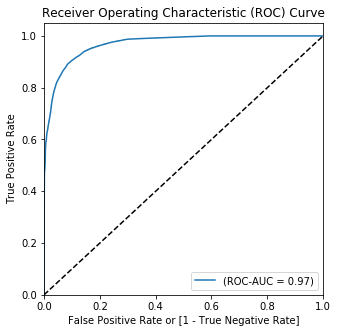

In [158]:
# Predictions on the train set
y_train_predl2_adasyn = logL2_reg_adasyn_model.predict(X_train_adasyn)

# Predicted probability for train set
y_train_predl2_proba_adasyn = logL2_reg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_predl2_proba_adasyn)

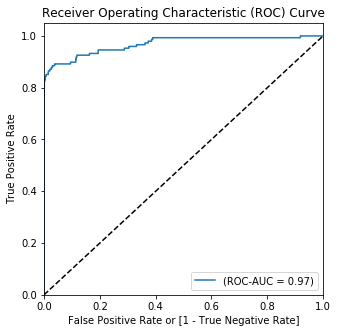

In [159]:
# Making prediction on the test set
y_test_predl2_adasyn = logL2_reg_adasyn_model.predict(X_test)
# Predicted probability for test set
y_test_predl2_proba_adasyn = logL2_reg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_predl2_proba_adasyn)

In [160]:
##Storing all the Metrics for the L1 Logistic regression model
roc_auc_train_l2_adasyn = roc_auc_score(y_train_adasyn, y_train_predl2_proba_adasyn)
roc_auc_test_l2_adasyn = roc_auc_score(y_test, y_test_predl2_proba_adasyn)
fpr_l2_adasyn, tpr_l2_adasyn, thresholds_l2_adasyn = roc_curve(y_train_adasyn, y_train_predl2_proba_adasyn)
threshold_l2_adasyn = thresholds_l2_adasyn[np.argmax(tpr_l2_adasyn - fpr_l2_adasyn)]
f1_score_l2_adasyn = round(f1_score(y_test, y_test_predl2_adasyn)*100,2)
recall_l2_adasyn = round(recall_score(y_test, y_test_predl2_adasyn)*100,3)

In [161]:
df_results_log_l2_adasyn = pd.DataFrame({'Model Name': 'Logistic Regression ADASYN Oversampled data (L2 Regularisation)','roc_auc_train':roc_auc_train_l2_adasyn,
                                        'roc_auc_test':roc_auc_test_l2_adasyn,'f1_score':f1_score_l2_adasyn,'recall_score':recall_l2_adasyn},index=[0])

In [162]:
df_results_log_l2_adasyn

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression ADASYN Oversampled data (L...,0.968577,0.968652,3.59,89.189


**Decision Tree using ADASYN Dataset**

In [138]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning Max_depth 

#perform cross validation
grid_params_dectr_adasyn = {'max_depth': range(1, 100,5)
                        }
cv_dtr_adasyn = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_adasyn = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_adasyn,
                            cv=cv_dtr_adasyn,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_adasyn.fit(X_train_adasyn,y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:  4.3min remaining:   39.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.8min finished


Best ROC AUC score for Decision Tree ADASYN Dataset:  0.9984126439795876
Best hyperparameters for Decision Tree ADASYN Dataset:  {'max_depth': 56}


In [139]:
# scores of GridSearch CV
scores_dtr_adasyn = grid_dtrcls_adasyn.cv_results_
pd.DataFrame(scores_dtr_adasyn).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.970723,0.069985,0.113696,0.013105,1,{'max_depth': 1},0.812415,0.811029,0.812770,0.812071,0.000751,20,0.812943,0.812159,0.812389,0.812497,0.000329
1,13.836336,0.130293,0.110704,0.007768,6,{'max_depth': 6},0.977336,0.980226,0.981314,0.979626,0.001678,19,0.977968,0.980984,0.981285,0.980079,0.001498
2,20.393476,0.373769,0.103056,0.000472,11,{'max_depth': 11},0.994732,0.992943,0.993297,0.993657,0.000773,18,0.995386,0.994541,0.994372,0.994766,0.000444
3,25.156075,0.414900,0.122007,0.014845,16,{'max_depth': 16},0.996550,0.996072,0.996022,0.996215,0.000238,17,0.997606,0.997618,0.997669,0.997631,0.000027
4,29.823598,0.525083,0.108044,0.004485,21,{'max_depth': 21},0.997214,0.997022,0.997055,0.997097,0.000084,16,0.998521,0.998589,0.998898,0.998669,0.000164


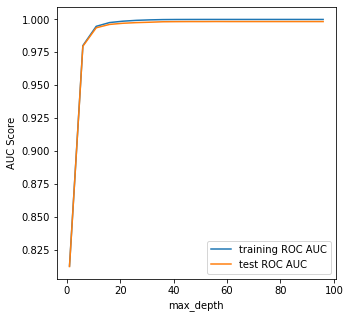

In [140]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_adasyn["param_max_depth"],
         scores_dtr_adasyn["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_adasyn["param_max_depth"],
         scores_dtr_adasyn["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [144]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning min_samples_leaf 

#perform cross validation
grid_params_dectr_adasyn1 = {'min_samples_leaf': range(5, 200, 20)}

cv_dtr_adasyn1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_adasyn1 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_adasyn1,
                            cv=cv_dtr_adasyn1,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_adasyn1.fit(X_train_adasyn,y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn1.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.7min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.8min remaining:   32.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.2min remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


Best ROC AUC score for Decision Tree ADASYN Dataset:  0.9988361160927749
Best hyperparameters for Decision Tree ADASYN Dataset:  {'min_samples_leaf': 45}


In [145]:
# scores of GridSearch CV
scores_dtr_adasyn1 = grid_dtrcls_adasyn1.cv_results_
pd.DataFrame(scores_dtr_adasyn1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,43.159276,1.388114,0.104720,0.001410,5,{'min_samples_leaf': 5},0.998693,0.998739,0.998624,0.998685,0.000047,4,0.999996,0.999996,0.999997,0.999996,2.937311e-07
1,39.448529,2.579795,0.110703,0.003731,25,{'min_samples_leaf': 25},0.998848,0.998926,0.998733,0.998836,0.000080,2,0.999927,0.999919,0.999924,0.999924,3.091508e-06
2,36.355637,1.446057,0.116356,0.009438,45,{'min_samples_leaf': 45},0.998893,0.998894,0.998722,0.998836,0.000081,1,0.999808,0.999805,0.999796,0.999803,4.969178e-06
3,33.860651,1.621678,0.107380,0.002488,65,{'min_samples_leaf': 65},0.998662,0.998849,0.998766,0.998759,0.000077,3,0.999618,0.999634,0.999673,0.999642,2.302600e-05
4,32.708066,0.272936,0.104721,0.004534,85,{'min_samples_leaf': 85},0.998723,0.998621,0.998643,0.998663,0.000044,5,0.999427,0.999439,0.999474,0.999447,2.017256e-05


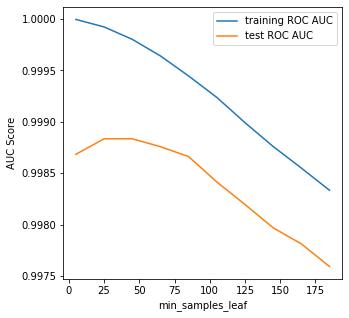

In [146]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_adasyn1["param_min_samples_leaf"],
         scores_dtr_adasyn1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_adasyn1["param_min_samples_leaf"],
         scores_dtr_adasyn1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [150]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning min_samples_split 

#perform cross validation
grid_params_dectr_adasyn2 = {'min_samples_split': range(20, 400, 20)}

cv_dtr_adasyn2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_adasyn2 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_adasyn2,
                            cv=cv_dtr_adasyn2,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_adasyn2.fit(X_train_adasyn,y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn2.best_params_)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  48 out of  57 | elapsed:  4.4min remaining:   49.5s
[Parallel(n_jobs=-1)]: Done  54 out of  57 | elapsed:  5.1min remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  5.5min finished


Best ROC AUC score for Decision Tree ADASYN Dataset:  0.9987549615127662
Best hyperparameters for Decision Tree ADASYN Dataset:  {'min_samples_split': 180}


In [151]:
# scores of GridSearch CV
scores_dtr_adasyn2 = grid_dtrcls_adasyn2.cv_results_
pd.DataFrame(scores_dtr_adasyn2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.146537,0.989742,0.108373,0.006925,20,{'min_samples_split': 20},0.998362,0.998580,0.998512,0.998485,0.000091,19,1.000000,1.000000,1.000000,1.000000,4.396424e-08
1,41.938385,0.716922,0.105049,0.000941,40,{'min_samples_split': 40},0.998546,0.998638,0.998558,0.998581,0.000041,18,0.999999,0.999999,0.999998,0.999999,3.803273e-07
2,41.488941,1.226125,0.127986,0.029385,60,{'min_samples_split': 60},0.998511,0.998699,0.998614,0.998608,0.000077,16,0.999997,0.999997,0.999997,0.999997,2.316283e-07
3,41.273195,1.013200,0.108039,0.004484,80,{'min_samples_split': 80},0.998529,0.998647,0.998579,0.998585,0.000048,17,0.999994,0.999995,0.999996,0.999995,9.547528e-07
4,41.072407,0.925904,0.113691,0.009600,100,{'min_samples_split': 100},0.998490,0.998729,0.998641,0.998620,0.000098,15,0.999991,0.999990,0.999993,0.999991,1.262804e-06


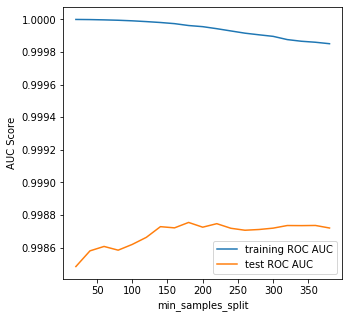

In [159]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_adasyn2["param_min_samples_split"],
         scores_dtr_adasyn2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_adasyn2["param_min_samples_split"],
         scores_dtr_adasyn2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("min_samples_split")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [156]:
## Hyper parameter tuning for Decision tree classifier 
## Tuning max_leaf_nodes 

#perform cross validation
grid_params_dectr_adasyn3 = {'max_leaf_nodes': range(200, 800, 50)}

cv_dtr_adasyn3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_dtrcls_adasyn3 = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = grid_params_dectr_adasyn3,
                            cv=cv_dtr_adasyn3,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_dtrcls_adasyn3.fit(X_train_adasyn,y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn3.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree ADASYN Dataset: ', grid_dtrcls_adasyn3.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:  2.1min remaining:   55.5s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  2.3min remaining:   33.3s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:  2.7min remaining:   14.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.8min finished


Best ROC AUC score for Decision Tree ADASYN Dataset:  0.9983117325391092
Best hyperparameters for Decision Tree ADASYN Dataset:  {'max_leaf_nodes': 650}


In [157]:
# scores of GridSearch CV
scores_dtr_adasyn3 = grid_dtrcls_adasyn3.cv_results_
pd.DataFrame(scores_dtr_adasyn3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,23.742824,0.195473,0.107707,0.005339,200,{'max_leaf_nodes': 200},0.995829,0.995154,0.995166,0.995383,0.000316,12,0.996425,0.996121,0.995888,0.996144,0.000220
1,26.087779,0.614409,0.108373,0.003291,250,{'max_leaf_nodes': 250},0.996896,0.996226,0.996472,0.996531,0.000277,11,0.997730,0.997497,0.997462,0.997563,0.000119
2,28.415794,0.830145,0.118014,0.020956,300,{'max_leaf_nodes': 300},0.997125,0.996846,0.996956,0.996976,0.000115,10,0.998149,0.998299,0.998286,0.998244,0.000068
3,30.114846,0.705986,0.115353,0.005297,350,{'max_leaf_nodes': 350},0.997342,0.997052,0.997289,0.997228,0.000126,9,0.998774,0.998775,0.998735,0.998761,0.000019
4,31.830517,0.565556,0.113692,0.005340,400,{'max_leaf_nodes': 400},0.997483,0.996873,0.997428,0.997261,0.000275,8,0.998994,0.998948,0.999065,0.999002,0.000048


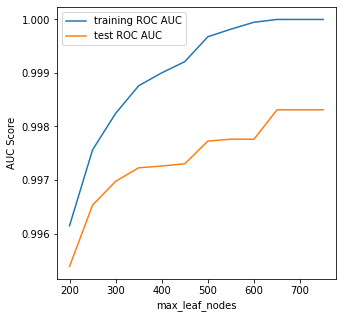

In [158]:
plt.figure(figsize=(5,5))
plt.plot(scores_dtr_adasyn3["param_max_leaf_nodes"],
         scores_dtr_adasyn3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_dtr_adasyn3["param_max_leaf_nodes"],
         scores_dtr_adasyn3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_leaf_nodes")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [160]:
## Optimal Hyper parameter tuning for Decision tree classifier
## 

#perform cross validation
opt_grid_params_dectr_adasyn = {'max_leaf_nodes': [650,700],
                            'min_samples_split': [180,220],
                             'min_samples_leaf':[45,55],
                             'max_depth':[56,61],
                             'criterion': ["entropy", "gini"]                             
                            }
opt_cv_dtr_adasyn = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_dtrcls_adasyn = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                            param_grid = opt_grid_params_dectr_adasyn,
                            cv=opt_cv_dtr_adasyn,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_dtrcls_adasyn.fit(X_train_adasyn,y_train_adasyn)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for Decision Tree ADASYN Dataset: ', opt_grid_dtrcls_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for Decision Tree ADASYN Dataset: ', opt_grid_dtrcls_adasyn.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  91 out of  96 | elapsed:  6.9min remaining:   22.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  7.0min finished


Best ROC AUC score for Decision Tree ADASYN Dataset:  0.9988655094532328
Best hyperparameters for Decision Tree ADASYN Dataset:  {'criterion': 'gini', 'max_depth': 56, 'max_leaf_nodes': 650, 'min_samples_leaf': 55, 'min_samples_split': 220}


In [163]:
##Decision Tree Model with optimal Hyperparameters

dtr_model_adasyn = DecisionTreeClassifier(random_state=42,
                                      max_leaf_nodes = 650,
                                      min_samples_split = 220,
                                      criterion = 'gini',
                                      max_depth=56,
                                      min_samples_leaf = 55
                                     )
# Fitting the model on train dataset
dtr_model_adasyn.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier(max_depth=56, max_leaf_nodes=650, min_samples_leaf=55,
                       min_samples_split=220, random_state=42)

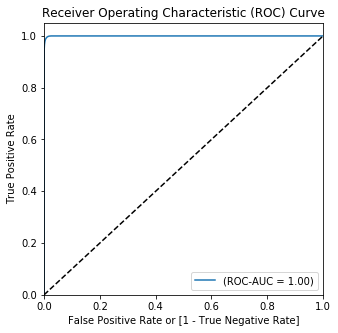

In [164]:
# Predictions on the train set
y_train_pred_adasyndtr = dtr_model_adasyn.predict(X_train_adasyn)

# Predicted probability for train set
y_train_pred_proba_adasyndtr = dtr_model_adasyn.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba_adasyndtr)

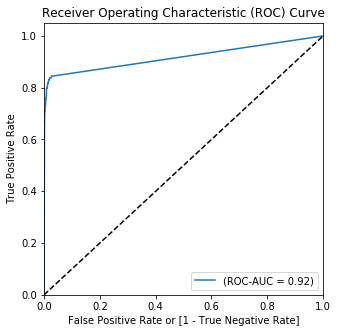

In [165]:
# Making prediction on the test set
y_test_pred_adasyndtr = dtr_model_adasyn.predict(X_test)
# Predicted probability for test set
y_test_pred_proba_adasyndtr = dtr_model_adasyn.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_adasyndtr)

In [166]:
##Storing all the Metrics for the Decision Tree Model Adasyn Balanced data
roc_auc_train_dtr_adasyn = roc_auc_score(y_train_adasyn, y_train_pred_proba_adasyndtr)
roc_auc_test_dtr_adasyn = roc_auc_score(y_test, y_test_pred_proba_adasyndtr)
fpr_dtr_adasyn, tpr_dtr_adasyn, thresholds_dtr_adasyn = roc_curve(y_train_adasyn, y_train_pred_proba_adasyndtr)
threshold_dtr_adasyn = thresholds_dtr_adasyn[np.argmax(tpr_dtr_adasyn - fpr_dtr_adasyn)]
f1_score_dtr_adasyn = round(f1_score(y_test, y_test_pred_adasyndtr)*100,2)
recall_dtr_adasyn = round(recall_score(y_test, y_test_pred_adasyndtr)*100,3)

In [167]:
df_results_dtr_adasyn = pd.DataFrame({'Model Name': 'Decision Tree Balanced Adasyn Dataset','roc_auc_train':roc_auc_train_dtr_adasyn,
                                        'roc_auc_test':roc_auc_test_dtr_adasyn,'f1_score':f1_score_dtr_adasyn,'recall_score':recall_dtr_adasyn},index=[0])

In [168]:
df_results_dtr_adasyn

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Decision Tree Balanced Adasyn Dataset,0.999794,0.9183,19.15,80.405


**XGBOOST Classifier using ADASYN DATASET**

In [64]:
## Hyper parameter tuning for XGBOOST Classifier

##Tuning reg_lambda

#perform cross validation
grid_params_xgb_adasyn = {'reg_lambda':range(2,50,4)}

cv_xgb_adasyn = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_adasyn = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_adasyn,
                            cv=cv_xgb_adasyn,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed: 14.7min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 17.8min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 19.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 19.8min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9993143279490706
Best hyperparameters for XGBOOST ADASYN Dataset:  {'reg_lambda': 30}


In [65]:
# scores of GridSearch CV
scores_xgb_adasyn = grid_xgb_adasyn.cv_results_
pd.DataFrame(scores_xgb_adasyn).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,218.608115,12.475069,0.988965,0.092470,2,{'reg_lambda': 2},0.998527,0.998458,0.997554,0.998180,0.000443,11,0.998454,0.998632,0.997779,0.998288,0.000368
1,270.463025,29.711550,1.188118,0.122988,6,{'reg_lambda': 6},0.998697,0.999109,0.999035,0.998947,0.000179,5,0.998612,0.999238,0.999178,0.999010,0.000282
2,201.652404,15.390924,0.834066,0.060327,10,{'reg_lambda': 10},0.997694,0.997969,0.998178,0.997947,0.000198,12,0.997566,0.998187,0.998340,0.998031,0.000335
3,218.470361,38.483814,0.905638,0.134677,14,{'reg_lambda': 14},0.997669,0.997943,0.999009,0.998207,0.000578,10,0.997533,0.998138,0.999144,0.998272,0.000665
4,242.828529,20.765706,1.049342,0.123470,18,{'reg_lambda': 18},0.999139,0.998240,0.998748,0.998709,0.000368,7,0.999111,0.998405,0.998893,0.998803,0.000295


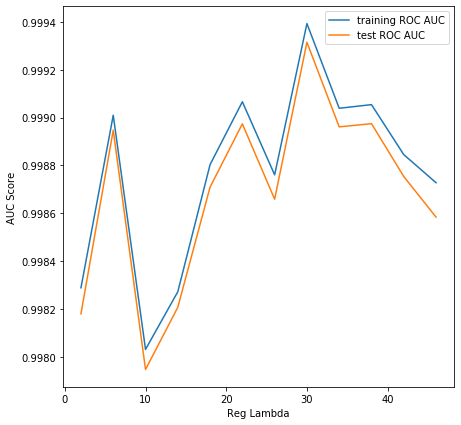

In [66]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_adasyn["param_reg_lambda"],
         scores_xgb_adasyn["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_adasyn["param_reg_lambda"],
         scores_xgb_adasyn["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("Reg Lambda")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [86]:
##Tuning max_depth

#perform cross validation
grid_params_xgb_adasyn1 = {'max_depth':range(1,40,5)}

cv_xgb_adasyn1 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_adasyn1 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_adasyn1,
                            cv=cv_xgb_adasyn1,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_adasyn1.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn1.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn1.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  7.7min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed: 11.4min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 14.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 17.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 20.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 20.1min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9993916593230224
Best hyperparameters for XGBOOST ADASYN Dataset:  {'max_depth': 6}


In [87]:
# scores of GridSearch CV
scores_xgb_adasyn1 = grid_xgb_adasyn1.cv_results_
pd.DataFrame(scores_xgb_adasyn1).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,154.227375,19.721734,0.894271,0.049106,1,{'max_depth': 1},0.982439,0.985433,0.984630,0.984167,0.001265,8,0.981856,0.986023,0.985150,0.984343,0.001794
1,303.137319,111.224127,1.084428,0.484976,6,{'max_depth': 6},0.999980,0.999838,0.998357,0.999392,0.000734,1,0.999964,0.999953,0.998619,0.999512,0.000632
2,166.320980,33.283175,0.306513,0.049780,11,{'max_depth': 11},0.999257,0.998608,0.993361,0.997075,0.002640,7,0.999338,0.998855,0.994122,0.997439,0.002354
3,268.952701,114.263726,0.512292,0.329522,16,{'max_depth': 16},0.999947,0.998627,0.996639,0.998404,0.001360,6,0.999977,0.998896,0.997396,0.998756,0.001058
4,400.327785,139.483169,0.803182,0.392911,21,{'max_depth': 21},0.999932,0.999942,0.997572,0.999148,0.001115,4,0.999973,0.999969,0.998415,0.999452,0.000733


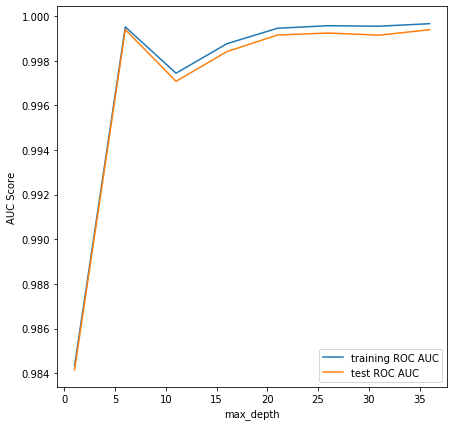

In [88]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_adasyn1["param_max_depth"],
         scores_xgb_adasyn1["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_adasyn1["param_max_depth"],
         scores_xgb_adasyn1["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("max_depth")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [70]:
##Tuning gamma

#perform cross validation
grid_params_xgb_adasyn2 = {'gamma':[i/10.0 for i in range(0,5)]}

cv_xgb_adasyn2 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_adasyn2 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_adasyn2,
                            cv=cv_xgb_adasyn2,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_adasyn2.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn2.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn2.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  3.8min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.3min remaining: 11.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.9min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  5.0min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  7.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.8min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.4min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9987077754390038
Best hyperparameters for XGBOOST ADASYN Dataset:  {'gamma': 0.0}


In [71]:
# scores of GridSearch CV
scores_xgb_adasyn2 = grid_xgb_adasyn2.cv_results_
pd.DataFrame(scores_xgb_adasyn2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,254.294791,29.631938,1.196122,0.233447,0,{'gamma': 0.0},0.998414,0.998961,0.998748,0.998708,0.000225,1,0.99833,0.999150,0.998913,0.998798,0.000345
1,260.046016,26.060925,1.201442,0.082486,0.1,{'gamma': 0.1},0.998414,0.998961,0.998748,0.998708,0.000225,2,0.99833,0.999150,0.998913,0.998798,0.000345
2,248.632525,28.194111,1.047522,0.163435,0.2,{'gamma': 0.2},0.998414,0.998961,0.998748,0.998708,0.000225,3,0.99833,0.999150,0.998913,0.998798,0.000345
3,217.618187,6.282729,0.834100,0.050016,0.3,{'gamma': 0.3},0.998414,0.998353,0.998748,0.998505,0.000174,4,0.99833,0.998565,0.998913,0.998603,0.000240
4,198.517816,3.617370,0.666876,0.033027,0.4,{'gamma': 0.4},0.998414,0.998353,0.998748,0.998505,0.000174,5,0.99833,0.998565,0.998913,0.998603,0.000240


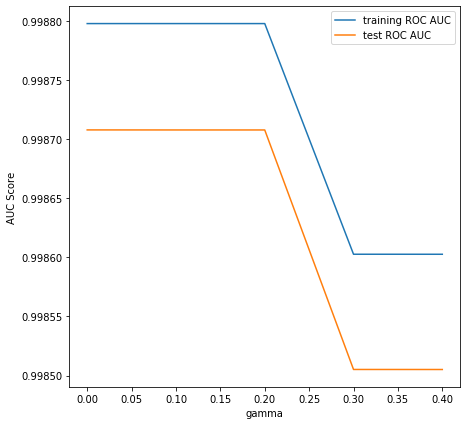

In [72]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_adasyn2["param_gamma"],
         scores_xgb_adasyn2["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_adasyn2["param_gamma"],
         scores_xgb_adasyn2["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("gamma")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [73]:
##Tuning learning_rate

#perform cross validation
grid_params_xgb_adasyn3 = {'learning_rate': [i/10.0 for i in range(1,10,2)]}

cv_xgb_adasyn3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_adasyn3 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_adasyn3,
                            cv=cv_xgb_adasyn3,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_adasyn3.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn3.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn3.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.7min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.9min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  3.4min remaining:   51.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9988462394449584
Best hyperparameters for XGBOOST ADASYN Dataset:  {'learning_rate': 0.3}


In [74]:
# scores of GridSearch CV
scores_xgb_adasyn3 = grid_xgb_adasyn3.cv_results_
pd.DataFrame(scores_xgb_adasyn3).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,219.574925,12.293766,0.681499,0.039630,0.1,{'learning_rate': 0.1},0.998414,0.998961,0.998748,0.998708,0.000225,2,0.998330,0.999150,0.998913,0.998798,0.000345
1,108.339140,6.510885,0.462758,0.028311,0.3,{'learning_rate': 0.3},0.999078,0.998738,0.998723,0.998846,0.000164,1,0.999042,0.998911,0.998831,0.998928,0.000087
2,76.161525,17.743576,0.366350,0.051388,0.5,{'learning_rate': 0.5},0.999429,0.997184,0.996188,0.997601,0.001356,3,0.999385,0.997530,0.996355,0.997757,0.001248
3,68.142388,20.175802,0.327788,0.038321,0.7,{'learning_rate': 0.7},0.997831,0.993572,0.999770,0.997058,0.002589,4,0.997643,0.994013,0.999893,0.997183,0.002423
4,43.314377,5.649738,0.219082,0.026464,0.9,{'learning_rate': 0.9},0.996964,0.987905,0.994681,0.993184,0.003847,5,0.996958,0.988842,0.994862,0.993554,0.003440


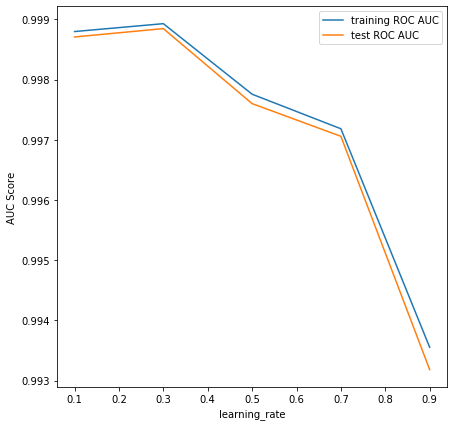

In [75]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_adasyn3["param_learning_rate"],
         scores_xgb_adasyn3["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_adasyn3["param_learning_rate"],
         scores_xgb_adasyn3["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("learning_rate")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [76]:
##Tuning subsample

#perform cross validation
grid_params_xgb_adasyn4 = {'subsample':  [i/10.0 for i in range(4,11)]}

cv_xgb_adasyn4 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_xgb_adasyn4 = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = grid_params_xgb_adasyn4,
                            cv=cv_xgb_adasyn4,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
grid_xgb_adasyn4.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn4.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', grid_xgb_adasyn4.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  5.4min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  6.0min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  8.0min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  9.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  9.8min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9988314487343933
Best hyperparameters for XGBOOST ADASYN Dataset:  {'subsample': 0.9}


In [84]:
# scores of GridSearch CV
scores_xgb_adasyn4 = grid_xgb_adasyn4.cv_results_
pd.DataFrame(scores_xgb_adasyn4).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,164.558218,7.770108,0.896925,0.031845,0.4,{'subsample': 0.4},0.997793,0.998241,0.998024,0.998019,0.000183,5,0.997663,0.998404,0.998196,0.998088,0.000312
1,206.203263,60.575801,1.060153,0.340011,0.5,{'subsample': 0.5},0.999484,0.997642,0.996866,0.997997,0.001098,6,0.999491,0.997869,0.997095,0.998151,0.000998
2,229.596926,38.118859,1.142266,0.138854,0.6,{'subsample': 0.6},0.999022,0.999186,0.998110,0.998772,0.000473,2,0.998951,0.999286,0.998282,0.998840,0.000418
3,170.715346,18.863623,0.842073,0.095564,0.7,{'subsample': 0.7},0.998627,0.997211,0.996767,0.997535,0.000793,7,0.998555,0.997476,0.997039,0.997690,0.000637
4,202.318820,15.068917,0.965076,0.150014,0.8,{'subsample': 0.8},0.998187,0.998579,0.998192,0.998319,0.000184,4,0.998105,0.998752,0.998376,0.998411,0.000265


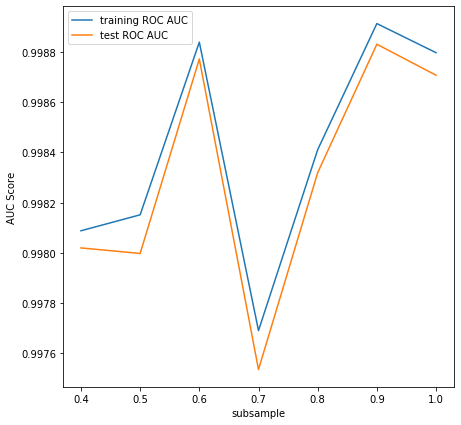

In [85]:
plt.figure(figsize=(7,7))
plt.plot(scores_xgb_adasyn4["param_subsample"],
         scores_xgb_adasyn4["mean_train_score"],
         label="training ROC AUC")
plt.plot(scores_xgb_adasyn4["param_subsample"],
         scores_xgb_adasyn4["mean_test_score"],
         label="test ROC AUC")
plt.xlabel("subsample")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [89]:
## Optimal Hyper parameter tuning for XGBOOST Classifier

##Tuning subsample

#perform cross validation
opt_grid_params_xgb_adasyn = { 'max_dpth':[5,6],
    'learning_rate':[0.25,0.3],
    'gamma':[0.0],
    'reg_lambda':[30,32],
    'subsample': [0.9]}

opt_cv_xgb_adasyn = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


opt_grid_xgb_adasyn = GridSearchCV(estimator = xgb.XGBClassifier(objective ='binary:logistic',
                                seed = 42, n_estimators=1000),
                            param_grid = opt_grid_params_xgb_adasyn,
                            cv=opt_cv_xgb_adasyn,
                            n_jobs=-1,
                            verbose = 10,
                            scoring='roc_auc',
                            return_train_score=True
                           )

#perform hyperparameter tuning
opt_grid_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn,
                   early_stopping_rounds = 20,
                   eval_metric = 'auc',
                   eval_set =[(X_test,y_test)],
                   verbose =False)


#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score for XGBOOST ADASYN Dataset: ', opt_grid_xgb_adasyn.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters for XGBOOST ADASYN Dataset: ', opt_grid_xgb_adasyn.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  4.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  6.0min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  6.6min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  7.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.0min finished


Best ROC AUC score for XGBOOST ADASYN Dataset:  0.9995282567340252
Best hyperparameters for XGBOOST ADASYN Dataset:  {'gamma': 0.0, 'learning_rate': 0.3, 'max_dpth': 5, 'reg_lambda': 32, 'subsample': 0.9}


In [169]:
## Creating the model using the above hyperparameters
xgb_adasyn_final = xgb.XGBClassifier(objective='binary:logistic' 
                            ,seed = 42
                            ,learning_rate = 0.3
                            ,gamma = 0.0
                            ,max_depth =5
                            ,reg_lambda = 33
                            ,subsample = 0.9
                            )

# Fitting the model on train dataset
xgb_adasyn_final.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(gamma=0.0, learning_rate=0.3, max_depth=5, reg_lambda=33, seed=42,
              subsample=0.9)

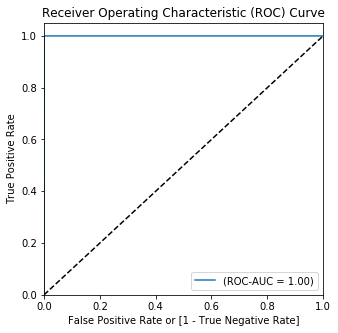

In [170]:
# Predictions on the train set
y_train_pred_xgb_adasyn = xgb_adasyn_final.predict(X_train_adasyn)

# Predicted probability
y_train_pred_proba_xgb_adasyn = xgb_adasyn_final.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba_xgb_adasyn)

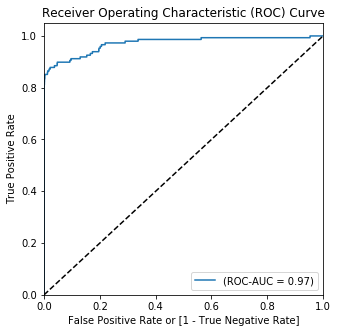

In [171]:
# Making prediction on the test set
y_test_pred_xgb_adasyn = xgb_adasyn_final.predict(X_test)

# Predicted probability
y_test_pred_proba_xgb_adasyn = xgb_adasyn_final.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xgb_adasyn)

In [172]:
##Storing all the Metrics for the XGBOOST MOdel Randomly Oversampled
roc_auc_train_xgb_adasyn = roc_auc_score(y_train_adasyn, y_train_pred_proba_xgb_adasyn)
roc_auc_test_xgb_adasyn = roc_auc_score(y_test, y_test_pred_proba_xgb_adasyn)
fpr_xgb_adasyn, tpr_xgb_adasyn, thresholds_xgb_adasyn = roc_curve(y_train_adasyn, y_train_pred_proba_xgb_adasyn)
threshold_xgb_adasyn = thresholds_xgb_adasyn[np.argmax(tpr_xgb_adasyn -fpr_xgb_adasyn)]
f1_score_xgb_adasyn = round(f1_score(y_test, y_test_pred_xgb_adasyn)*100,2)
recall_xgb_adasyn = round(recall_score(y_test, y_test_pred_xgb_adasyn)*100,3)

In [173]:
df_results_xgb_adasyn = pd.DataFrame({'Model Name': 'XGBOOST Classifier ADASYN Dataset','roc_auc_train':roc_auc_train_xgb_adasyn,
                                        'roc_auc_test':roc_auc_test_xgb_adasyn,'f1_score':f1_score_xgb_adasyn,'recall_score':recall_xgb_adasyn},index=[0])

In [174]:
df_results_xgb_adasyn

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,XGBOOST Classifier ADASYN Dataset,0.999996,0.971738,64.36,81.757


In [184]:
pd.set_option("display.max_colwidth", -1)

In [186]:
###Printing the metrics for models built on balanced dataset##

pd.concat([df_results_log_l1_ovr,df_results_log_l2_ovr,df_results_dtr_ovr,df_results_xgb_ovr
           ,df_results_log_l1_smote,df_results_log_l2_smote,df_results_dtr_smote,df_results_xgb_smote
           ,df_results_log_l2_adasyn,df_results_log_l1_adasyn,df_results_dtr_adasyn,df_results_xgb_adasyn])

,Model Name,roc_auc_train,roc_auc_test,f1_score,recall_score
0,Logistic Regression Random Oversampled data (L1 Regularisation),0.986871,0.971021,11.33,87.838
0,Logistic Regression Random Oversampled data (L2 Regularisation),0.986871,0.971021,11.34,87.838
0,Decision Tree Random Oversampled Data,0.999943,0.891458,45.76,78.378
0,XGBOOST Classifier Random Oversampled Data,1.000000,0.967454,84.17,79.054
0,Logistic Regression SMOTE Oversampled data (L1 Regularisation),0.991365,0.968544,10.86,87.162
0,Logistic Regression SMOTE Oversampled data (L2 Regularisation),0.991386,0.968502,10.91,87.838
0,Decision Tree SMOTE Dataset,0.999387,0.927443,14.29,83.108
0,XGBOOST Classifier SMOTE Dataset,1.000000,0.974931,82.00,83.108
0,Logistic Regression ADASYN Oversampled data (L2 Regularisation),0.968577,0.968652,3.59,89.189
0,Logistic Regression ADASYN Oversampled data (L1 Regularisation),0.968571,0.968664,3.59,89.189


### Printing the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


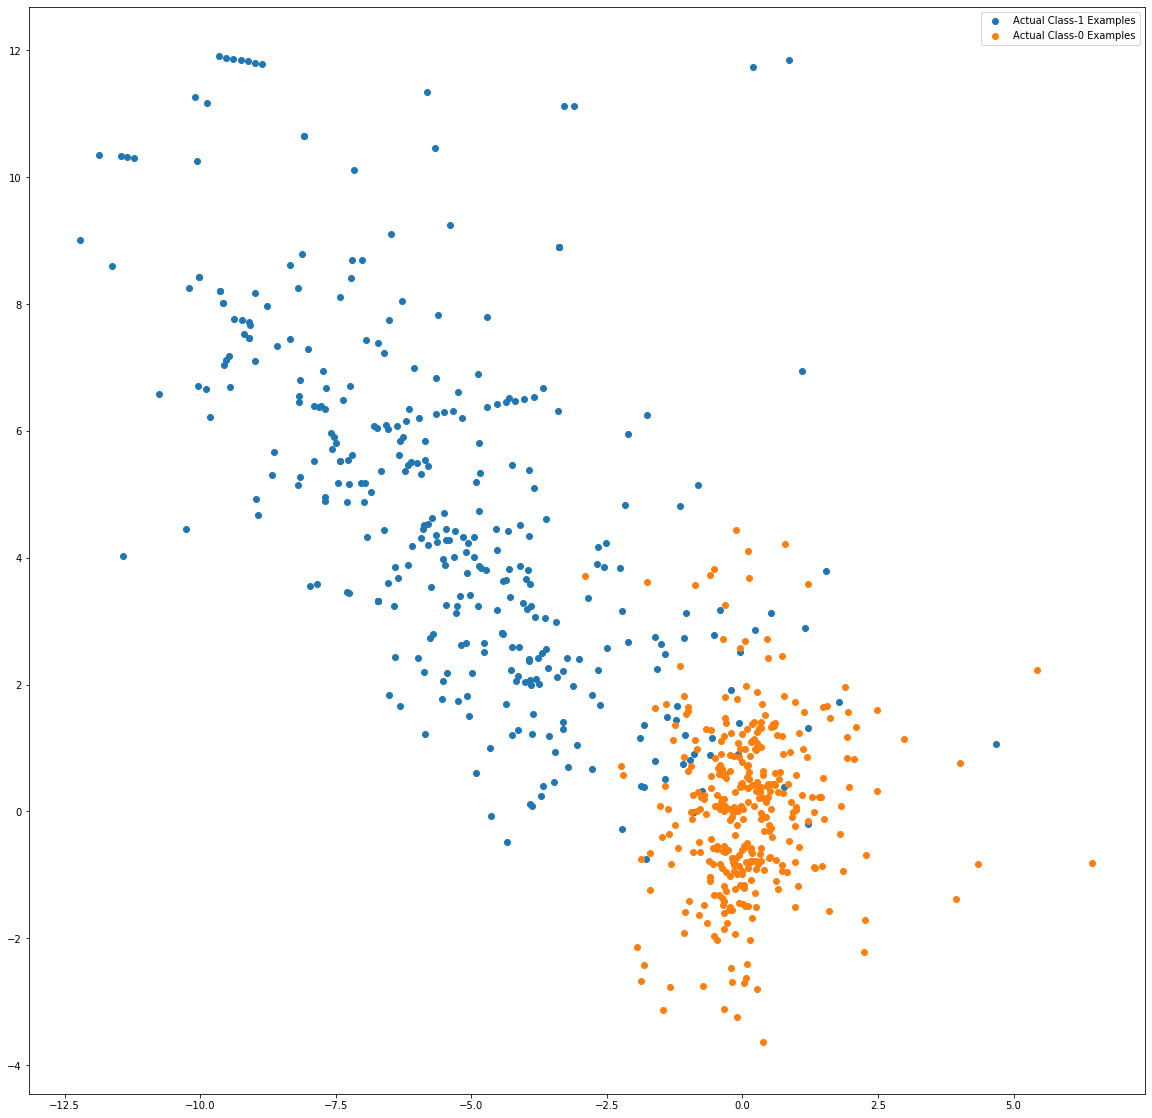

In [175]:
var_imp = []
for i in xgb_adasyn_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**Printing the  AUC and Threshold for the best model on Balanced Dataset (XGBOOST WITH ADASYN DATASET)**

In [181]:
print('Train AUC ADASYN =', roc_auc_train_xgb_adasyn,'\n')

print('Threshold ADASYN =' , threshold_xgb_adasyn)

Train AUC ADASYN = 0.999996431000267 

Threshold ADASYN = 0.8961291


**Based on the above metrics for all the models built using balanced dataset we can see that XGBOOST model with ADASYN technique turns out to be optimal with Train AUC of 99% , Test AUC of 97% Threshold of 89% and a relatively high Recall score of 81.7%**